In [1]:
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re  
import requests
from bs4 import BeautifulSoup
from matplotlib.patches import Circle

import unicodedata
from PIL import Image
import requests
from io import BytesIO
import tkinter as tk
from tkinter import Label
from PIL import Image, ImageTk
from io import BytesIO
import threading
from IPython.display import display

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HTML, VBox, HBox, Dropdown, FloatRangeSlider, IntSlider, Checkbox, Layout, Output, Label
from ipywidgets import Output, HBox, VBox, Checkbox, Layout, Label, IntRangeSlider
from matplotlib.lines import Line2D

import seaborn as sns


In [2]:
df=pd.read_csv('..\Datos\datos_subastas_procesado.csv')
Artistas=pd.read_csv('..\Datos\Artistas.csv')
Subastas=pd.read_csv('..\Datos\Subastas.csv')

In [3]:
Artistas.head()

,Nombre,Año de nacimiento,País,Apariciones,Obras vendidas,Total ventas,Precio medio,MinEst Medio,MaxEst Medio,EstA_ma,EstG_ma,Género1,Género2,Técnica1,Técnica2
0,GABRIEL ZEHENDER,1527.0,Suiza,1,1,352800.0,352800.00,100000.0,150000.0,125000.0,122474.49,Retrato y figura humana,NaN,Óleo y témperas,NaN
1,PIETER COECKE VAN AELST I,1502.0,Bélgica,4,3,731650.0,243883.33,96500.0,139500.0,118000.0,116024.78,Pintura religiosa,Retrato y figura humana,Óleo y témperas,Técnicas de dibujo húmedas
2,GEORGE GOWER,1538.0,Reino Unido,2,2,920950.0,460475.00,154000.0,256000.0,205000.0,198554.78,Retrato y figura humana,NaN,Óleo y témperas,NaN
3,QUENTIN METSYS,1550.0,Desconocido,4,4,10757720.0,2689430.00,2014500.0,3021750.0,2518125.0,2467248.54,Pintura religiosa,Retrato y figura humana,Óleo y témperas,NaN
4,MASTER OF THE LEGEND OF SAINT LUCY,1470.0,Bélgica,2,2,691500.0,345750.00,185000.0,300000.0,242500.0,235584.38,Pintura religiosa,NaN,Óleo y témperas,NaN


In [4]:
Artistas.loc[Artistas['Nombre']=='FRANCISCO JOSE DE GOYA Y LUCIENTES']

,Nombre,Año de nacimiento,País,Apariciones,Obras vendidas,Total ventas,Precio medio,MinEst Medio,MaxEst Medio,EstA_ma,EstG_ma,Género1,Género2,Técnica1,Técnica2
275,FRANCISCO JOSE DE GOYA Y LUCIENTES,1746.0,Francia,3,3,16462840.0,5487613.33,5010000.0,6680000.0,5845000.0,5785049.7,Retrato y figura humana,NaN,Óleo y témperas,NaN


In [5]:
graf_Años = pd.DataFrame(columns=['Año', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioM'])
min_año = int(df['Año de nacimiento'].min())
max_año = int(df['Año de nacimiento'].max()) 
Años = range(min_año + 100, max_año - 40, 4)
idxFilas = [list(df.loc[abs(df['Año de nacimiento'] - año) <= 30].index) for año in Años]
graf_Años['Año'] = Años

In [6]:
for i, año in graf_Años.iterrows():
    
    graf_Años.loc[i, 'TObras'] = len(idxFilas[i])
    graf_Años.loc[i, 'TVentas'] = sum([df.loc[j, 'Vendido'] for j in idxFilas[i]])
    
    TotalV = sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])])
    TmaxE = sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])])
    TminE = sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])])
    
    graf_Años.loc[i, 'PrecioM'] = round(TotalV / graf_Años.loc[i, 'TVentas'] , 2)
    graf_Años.loc[i, 'MaxEst Medio'] = round(TmaxE / graf_Años.loc[i, 'TObras'] , 2)
    graf_Años.loc[i, 'MinEst Medio'] = round(TminE / graf_Años.loc[i, 'TObras'] , 2)
    
    
graf_Años.tail()

,Año,TObras,TVentas,MinEst Medio,MaxEst Medio,PrecioM
117,1818,1352,1228,250007.77,382996.01,621984.01
118,1822,1479,1345,237745.84,364127.05,582742.85
119,1826,1590,1451,242113.08,369729.5,655702.91
120,1830,1654,1507,226299.15,345996.31,647109.44
121,1834,1729,1565,227559.05,347806.82,655522.24


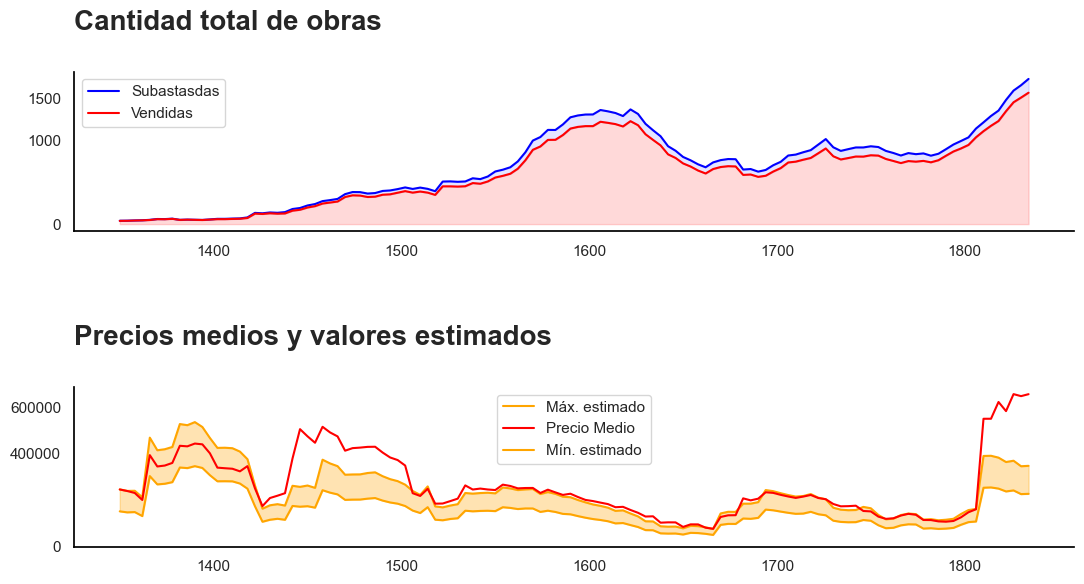

In [7]:

sns.set_theme(style="white")  

# Crear figura y ejes para dos subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 6))  # Dos filas, una columna

# Asegúrate de que 'MaxEst Medio' y 'MinEst Medio' son numéricos
graf_Años['TVentas'] = pd.to_numeric(graf_Años['TVentas'], errors='coerce')
graf_Años['TObras'] = pd.to_numeric(graf_Años['TObras'], errors='coerce')

# Primer gráfico

axes[0].set_title("Cantidad total de obras",  fontsize=20, fontweight='bold', loc='left', pad = 30)
sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15) 
axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.1, interpolate=True)

# Eliminar etiquetas de los ejes
axes[0].set_xlabel("") 
axes[0].set_ylabel("") 


# Configurar ticks del eje Y
yticks = axes[0].get_yticks() 
axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])

# Quitar cuadrícula
axes[0].grid(False)

# Configurar color de las líneas de los ejes
axes[0].spines['bottom'].set_color('black')  # Línea inferior (eje X)
axes[0].spines['left'].set_color('black')  # Línea izquierda (eje Y)
axes[0].spines['top'].set_color('none')  # Línea superior (ocultar)
axes[0].spines['right'].set_color('none')  # Línea derecha (ocultar)

# Segundo gráfico

axes[1].set_title("Precios medios y valores estimados",  fontsize=20, fontweight='bold', loc='left', pad = 30)
# Asegúrate de que 'MaxEst Medio' y 'MinEst Medio' son numéricos
graf_Años['MaxEst Medio'] = pd.to_numeric(graf_Años['MaxEst Medio'], errors='coerce')
graf_Años['MinEst Medio'] = pd.to_numeric(graf_Años['MinEst Medio'], errors='coerce')


sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
sns.lineplot(x="Año", y="PrecioM", data=graf_Años, label='Precio Medio', color='red', ax=axes[1])
sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])




axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.3) 


axes[1].set_xlabel("") 
axes[1].set_ylabel("") 

# Configurar ticks del eje Y del segundo gráfico
yticks2 = axes[1].get_yticks() 
axes[1].set_yticks([yticks2[0], yticks2[int(len(yticks2) / 2)], yticks2[-2]])

# Quitar cuadrícula para el segundo gráfico
axes[1].grid(False)

# Configurar color de las líneas de los ejes del segundo gráfico
axes[1].spines['bottom'].set_color('black')  # Línea inferior (eje X)
axes[1].spines['left'].set_color('black')  # Línea izquierda (eje Y)
axes[1].spines['top'].set_color('none')  # Línea superior (ocultar)
axes[1].spines['right'].set_color('none')  # Línea derecha (ocultar)

# Mostrar la figura
plt.tight_layout(h_pad= 4)  # Ajustar el espaciado entre subgráficos
plt.show()




In [8]:
def representar_obras_y_precios_por_año(paiseselegidos, generoselegidos):
    rango=40
    graf_Años = pd.DataFrame(columns=['Año', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioMv', 'PrecioMs'])
    min_año = int(df['Año de nacimiento'].min())
    max_año = int(df['Año de nacimiento'].max()) 
    Años = range(min_año + rango, max_año - rango+1, 2)
    idxFilas = [list(df.loc[(abs(df['Año de nacimiento'] - año) <= rango) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in Años]
    
    
    idFilas = [list(df.loc[(df['Año de nacimiento'] == año) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in list(df['Año de nacimiento'].unique())]
    
    TObras = []
    TVentas = []   
    PrecioMv = [] 
    PrecioMs = []    
    MaxEst = []    
    MinEst = []
    
    graf_Años['Año'] = Años
    
    for i, año in enumerate(graf_Años['Año']):
        TObras.append((len(idxFilas[i]) if len(idxFilas[i]) > 0 else 1)/(2*rango))
        TVentas.append((sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) if sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) > 0 else 1)/(2*rango))
        
        
        PrecioMv.append(round(sum((df.loc[j, 'Precio_num'] if df.loc[j, 'Vendido']==1 else 0) for j in idxFilas[i]) /(2*rango* TVentas[i]), 2) if TVentas[i] > 0 else 0 )
        PrecioMs.append(round(sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)        
        MaxEst.append(round(sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        MinEst.append(round(sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        
    graf_Años['TObras'] = TObras
    graf_Años['TVentas'] = TVentas
    graf_Años['PrecioMv'] = PrecioMv
    graf_Años['PrecioMs'] = PrecioMs
    graf_Años['MaxEst Medio'] = MaxEst
    graf_Años['MinEst Medio'] = MinEst

    TotalObras = sum(TObras) 
    TotalVentas = sum(TVentas)  
    TotalObrasABS = sum(len(idFilas[i]) for i, año in enumerate(Años))
    TotalVentasABS = sum(sum([df.loc[j, 'Vendido'] for j in idFilas[i]]) for i, año in enumerate(Años))
    
    Porcentaje = round((TotalVentasABS/TotalObrasABS) * 100, 2) if TotalObrasABS > 0 else 0
    
    PrecioMvGlobal = sum((PrecioMv[i] * TVentas[i] for i in range(len(Años)))) / TotalVentas if TotalVentas > 0 else 0
    PrecioMsGlobal = sum((PrecioMs[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMaxMGlobal = sum((MaxEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMinMGlobal = sum((MinEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    

    with graf_output:
        graf_output.clear_output(wait=True)
        
        sns.set_theme(style="white")

        # Crear figura y ejes para dos subgráficos
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 9))

        # Primer gráfico
        axes[0].set_title("Número de obras", fontsize=20, fontweight='bold', loc='left', pad=30)
        sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
        sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

        # Rellenar área entre líneas
        axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15)
        axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.3)

        # Configuración del gráfico
        axes[0].set_xlabel("")
        axes[0].set_ylabel("")
        yticks = axes[0].get_yticks()
        axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])
        axes[0].grid(False)
        axes[0].spines['bottom'].set_color('black')
        axes[0].spines['left'].set_color('black')
        
        # Segundo gráfico
        axes[1].set_title("Precios medios y valores estimados", fontsize=20, fontweight='bold', loc='left', pad=30)

        sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMv", data=graf_Años, label='Precio Medio por venta', color='red', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMs", data=graf_Años, label='medio por subasta', color='blue', ax=axes[1], linewidth=0.7, linestyle='--')
        
        sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])

        
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], color='brown', linewidth=0.5, linestyle='--')
        axes[1].plot([min_año - 10, max_año + 10], [PrecioMvGlobal, PrecioMvGlobal], color='red', linewidth=0.8)
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='brown', linewidth=0.5, linestyle='--')
        
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between([min_año+30, max_año-29], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='limegreen', alpha=0.3)
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between(graf_Años['Año'], graf_Años['PrecioMv'], graf_Años['PrecioMs'], color='blue', alpha=0.3)
        
        axes[1].set_xlim(min_año, max_año)
        axes[1].set_xlabel("")
        axes[1].set_ylabel("")
        axes[1].set_yticks([graf_Años['PrecioMv'].quantile(0.25), PrecioMvGlobal ,graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].max() ])
        axes[1].grid(False)
        axes[1].spines['bottom'].set_color('black')
        axes[1].spines['left'].set_color('black')

        plt.tight_layout(h_pad=4)
        plt.show()
        
    with totales_output1:
        totales_output1.clear_output(wait=True)
        
        fig, axe = plt.subplots(nrows=4, ncols=1, figsize=(3, 4))
        axe[0].set_title("Totales:", fontsize=20, color='black', fontweight='bold', loc='center', pad=10)
        axe[0].spines['top'].set_visible(False)
        axe[0].spines['bottom'].set_visible(False)
        axe[0].spines['left'].set_visible(False)
        axe[0].spines['right'].set_visible(False)
        axe[0].set_xticks([])
        axe[0].set_yticks([])

        axe[1].set_title(f"Subastadas: {TotalObrasABS}", fontsize=15, color='blue', fontweight='bold', loc='center', pad=10)
        axe[1].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[1].set_ylim(0,1)
        
        axe[1].spines['top'].set_visible(False)
        axe[1].spines['bottom'].set_visible(False)
        axe[1].spines['left'].set_visible(False)
        axe[1].spines['right'].set_visible(False)
        axe[1].set_xticks([])
        axe[1].set_yticks([])


        axe[2].set_title(f"Vendidas: {TotalVentasABS}", fontsize=15, color='red', fontweight='bold', loc='center', pad=10)
        axe[2].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[2].set_ylim(0,1)
        
        axe[2].spines['top'].set_visible(False)
        axe[2].spines['bottom'].set_visible(False)
        axe[2].spines['left'].set_visible(False)
        axe[2].spines['right'].set_visible(False)
        axe[2].set_xticks([])
        axe[2].set_yticks([])

        axe[3].set_title( f"{Porcentaje} %", fontsize=20, color='purple', fontweight='bold', loc='center', pad=10)
        axe[3].plot([0, 1], [1,1], color='black', linewidth=5)
        axe[3].set_ylim(0,1)
        axe[3].spines['top'].set_visible(False)
        axe[3].spines['bottom'].set_visible(False)
        axe[3].spines['left'].set_visible(False)
        axe[3].spines['right'].set_visible(False)
        axe[3].set_xticks([])
        axe[3].set_yticks([])


        plt.tight_layout(h_pad=1)
        plt.show()
        
        
    with totales_output2:
        totales_output2.clear_output(wait=True)
        
        fig, ax1 = plt.subplots(figsize=(3, 4.2))
        ax1.set_title("Promedios globales", fontsize=16, fontweight='bold', loc='center', pad=40)

        # Línea central vertical más gruesa usando plt.plot para ajustar linewidth
        ax1.plot([1.3, 1.3], [EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15], color='black', linewidth=1)

        # Líneas horizontales
        sns.lineplot(x=[1, 1.6], y=[PrecioMvGlobal, PrecioMvGlobal], color='red', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMaxMGlobal, EstMaxMGlobal], color='orange', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMinMGlobal, EstMinMGlobal], color='orange', ax=ax1)

        # Áreas sombreadas
        ax1.fill_between([1.15, 1.45], [EstMinMGlobal, EstMinMGlobal], [EstMaxMGlobal, EstMaxMGlobal], color='orange', alpha=0.4)
        ax1.fill_between([1, 1.6], [PrecioMsGlobal, PrecioMsGlobal], [PrecioMvGlobal, PrecioMvGlobal], color='blue', alpha=0.2)

        ax1.grid(False)

        # Configurar los ejes
        ax1.set_xlim(1, 1.6)
        ax1.set_ylim(min(EstMinMGlobal,PrecioMvGlobal) * 0.75, max(PrecioMvGlobal, EstMaxMGlobal) * 1.15)

        # Ajustar visibilidad de los bordes
        ax1.spines['top'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        # Personalizar el spine derecho
        ax1.spines['right'].set_linestyle('-.')
        ax1.spines['right'].set_linewidth(0.6)
        ax1.spines['left'].set_linestyle('-.')
        ax1.spines['left'].set_linewidth(0.6)

        ax1.set_xticks([])
        ax1.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])
        ax1.set_yticklabels(['Est. Min', 'Est. Max', 'Precio'])
        
        ax2 = ax1.twinx()
        ax2.set_ylim(EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15)

        ax2.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])

        plt.tight_layout()
        plt.show()

# Crear widgets de selección de países y géneros
Paises = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Países Bajos', 'Francia', 'Reino Unido', 'Italia', 'Austria', 'Suiza', 'Desconocido']
Generos = df['Género'].unique()

# Widgets de selección de países
selectorespais = {pais: Checkbox(value=True, description=pais, layout=Layout(width='auto')) for pais in Paises}
# Widgets de selección de géneros
selectoresgeneros = {genero: Checkbox(value=True, description=genero, layout=Layout(width='auto')) for genero in Generos}

# Crear etiquetas estilizadas
etiqueta_pais = HTML(value="<h3 style='text-align:center; font-weight:bold;'>País</h3>")
etiqueta_genero = HTML(value="<h3 style='text-align:center; font-weight:bold;'>Género</h3>")

# Contenedor para filtros de país con la etiqueta estilizada
columnapais = VBox([etiqueta_pais] + list(selectorespais.values()), layout=Layout(margin='20px 0 10px 0px' ))

# Contenedor para filtros de género con la etiqueta estilizada
columnagenero = VBox([etiqueta_genero] + list(selectoresgeneros.values()), layout=Layout(margin='0 0 30px 0px' ))

# Crear un contenedor para los filtros organizados en dos columnas
Cajonfiltros = VBox([columnapais, columnagenero], layout=Layout(margin='10px 0 30px 0px' ))

# Crear un contenedor de salida para el gráfico con margen
graf_output = Output(layout=Layout(margin='10px 0 20px 10px'))  # Ajusta el margen izquierdo a tu gusto

totales_output1 = Output(layout=Layout(margin='0 0 10px 0'))
totales_output2 = Output(layout=Layout(margin='10px 0 0 0'))

totales_output = VBox([totales_output1, totales_output2], layout=Layout(margin='50px 5px 20px 5px' ))


def update_plot(*args):
    paiseselegidos = [pais for pais, checkbox in selectorespais.items() if checkbox.value]
    generoselegidos = [genero for genero, checkbox in selectoresgeneros.items() if checkbox.value]
    representar_obras_y_precios_por_año(paiseselegidos, generoselegidos)

# Observadores para los checkboxes
for checkbox in selectorespais.values():
    checkbox.observe(update_plot, 'value')

for checkbox in selectoresgeneros.values():
    checkbox.observe(update_plot, 'value')



# Mostrar los widgets y el gráfico
display(HBox([Cajonfiltros, graf_output, totales_output]))

# Mostrar el gráfico inicialmente
update_plot()


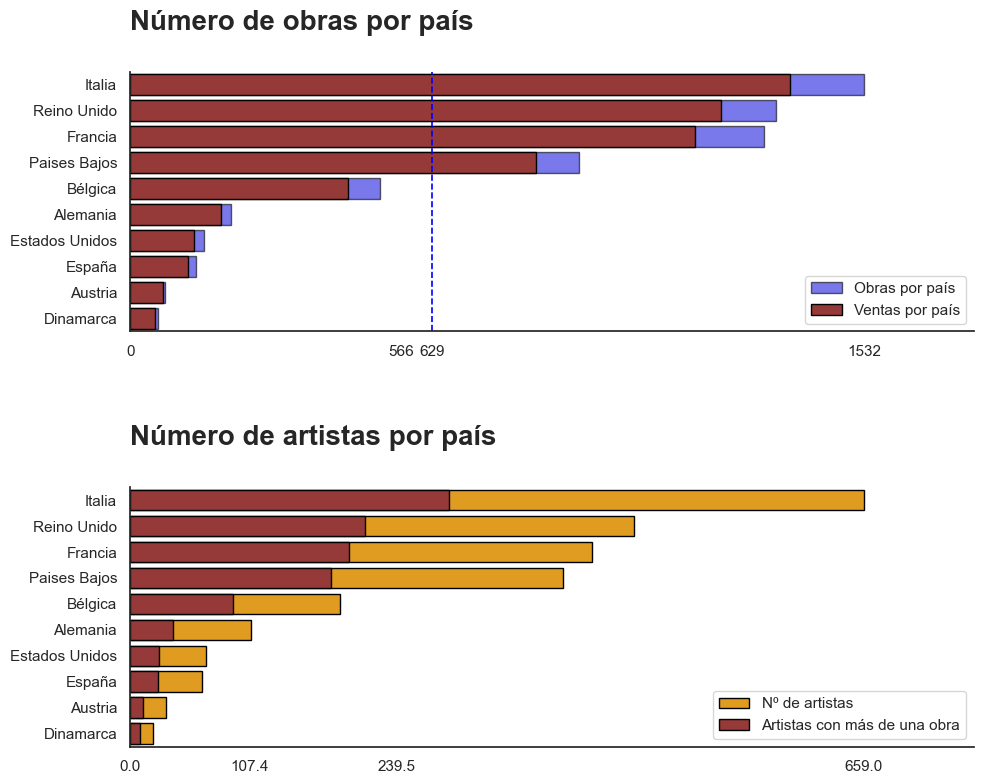

In [9]:
Paises = list(Artistas['País'].unique())
Paises.remove('Desconocido')

idxFilasArt = [list(Artistas.loc[Artistas['País'] == pais].index) for i,pais in enumerate( Paises)]
idxFilasOb = [list(df.loc[df['País'] == pais].index) for i,pais in enumerate( Paises)]

graf_paisesob =[[pais, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, pais in enumerate(Paises)]
graf_paisesart =[[ pais , len(idxFilasArt[i]), sum([(1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i]])]  for i, pais in enumerate(Paises)] 

graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

graf_paisesob = graf_paisesob [:10]
graf_paisesart = graf_paisesart [:10]

obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]



f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.set_color_codes("pastel")
sns.barplot(y=obras_y, x=obras_x, ax=ax[0], color='blue', alpha=0.6, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
sns.barplot(y=obras_y, x=ventas_x, ax=ax[0], color='brown',alpha=1, edgecolor='black', label='Ventas por país')
# Configurar el gráfico
ax[0].set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
ax[0].set_xlim(0, max(obras_x)*1.15)

ax[0].set_xticks([0,np.array(ventas_x).mean() ,np.array(obras_x).mean(), max(obras_x)])
sns.despine(right=True, top=True)
 

ax[0].axvline(np.mean(obras_x), linestyle='--', color='blue', linewidth=1.2)  # Media de obras


ax[0].legend()


# Plotear la cantidad total de artistas por país
sns.set_color_codes("pastel")
sns.barplot(y=artistas_y, x=artistas_x, ax=ax[1], color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
sns.barplot(y=artistas_y, x=conocido_x, ax=ax[1], color='brown', edgecolor='black', label='Artistas con más de una obra') 
# Configurar el gráfico
ax[1].set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
ax[1].set_xlim(0, max(artistas_x)*1.15)
sns.despine(right=True, top=True)

ax[1].set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])



plt.tight_layout(h_pad= 4)
plt.show()




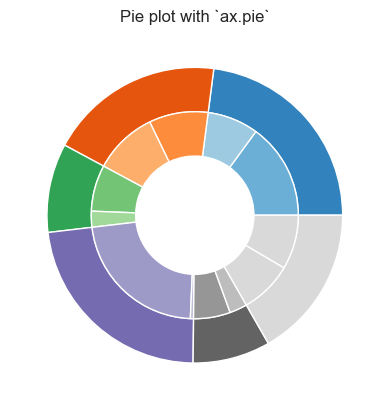

In [10]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.],[90,2], [23.,11], [33.,34]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10, 13, 14, 17,18, 21, 22])


ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

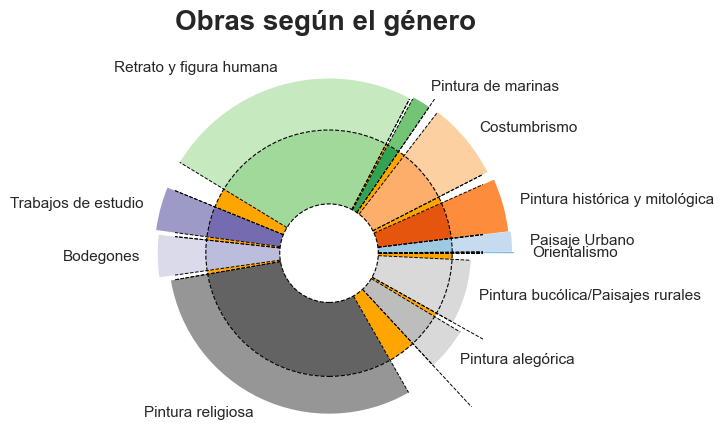

In [11]:
intervalo_años = [1400, 1700]
Años = range(intervalo_años[0], intervalo_años[1], 1) 

Generos = list(df['Género'].unique())

idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                            (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


graf_generos = sorted(graf_generos, key=lambda x: x[1], reverse=True)


graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
for genero in graf_generos:
      genero[1] = genero[1] - genero[2]
      genero[3] = genero[3]/preciomedio

sectores=[]
for  i,genero in enumerate(graf_generos):
      
      sectores.append([genero[0], genero[2], genero[3]])
      sectores.append([" ", genero[1], 1])
      

etiquetas = [sector[0] for i,sector in enumerate(sectores)]
valores = [sector[1] for i,sector in enumerate(sectores)]                                              
radios = [sector[2] for i,sector in enumerate(sectores)] 

valortotal = sum(valores)

max_radio=max(radios)
radios=[(radio/max_radio  if i % 2 == 0 else 1) for i, radio in enumerate(radios)]


fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title("Obras según el género", fontsize=20, fontweight='bold', loc='left', pad=50)

cmap = plt.colormaps["tab20c"]
inner_colors = cmap(range(len(etiquetas)))  




for i,genero in enumerate(graf_generos):
      
      try:
            vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
            colores=[(1, 1, 1, 0), inner_colors[2*i], (1, 1, 1, 0)]
      except:
            break
      
      ax.pie(vals, radius=1, colors=colores,
             
      wedgeprops=dict(width=0.6,edgecolor=None, linewidth=0))
      
for i,genero in enumerate(graf_generos):
      
      try:
            vals =np.array([np.array(valores[:2*i +1]).sum(), valores[2*i +1], np.array(valores[2*i+2:]).sum()])
            colores=[(1, 1, 1, 0), 'orange', (1, 1, 1, 0)]
      except:
            break
      
      ax.pie(vals, radius=1, colors=colores,
             
      wedgeprops=dict(width=0.6,edgecolor=None, linewidth=0))
      
for i, genero in enumerate(graf_generos):
      
      try:
            vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
            etiq=[None, etiquetas[2*i], None]
            colores=[(1, 1, 1, 0), inner_colors[2*i + 1], (1, 1, 1, 0)]
      except:
            break
      
      ax.pie(vals, radius=1 + radios[2*i]/2, colors=colores,
             
      wedgeprops=dict(width=radios[2*i]/2 ,edgecolor=None, linewidth=0), labels=etiq)
      
      
for i, genero in enumerate(graf_generos):
      
      try:
            vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
      except:
            break
      
      ax.plot([0.4*np.cos(np.array(valores[:2*i]).sum()/valortotal * 2*np.pi), 1.8*np.cos(np.array(valores[:2*i]).sum()/valortotal * 2*np.pi)] , [0.4*np.sin(np.array(valores[:2*i]).sum()/valortotal * 2*np.pi), 1.8*np.sin(np.array(valores[:2*i]).sum()/valortotal * 2*np.pi)], color='black', linestyle='--', linewidth=0.7)

# Asumimos que 'valores' es la lista donde tienes los tamaños de los segmentos
acum_angle = 0  # para acumular el ángulo

for i in range(len(graf_generos)):
    # Calcular el ángulo para cada segmento
    # Dibujar la línea radial usando el ángulo acumulado
    ax.plot(
        [0.4 * np.cos(acum_angle),(1 + radios[2*i]/2 )* np.cos(acum_angle)],
        [0.4 * np.sin(acum_angle), (1 + radios[2*i]/2 )* np.sin(acum_angle)],
        color='black', linestyle='--', linewidth=0.7
    )

    # Sumar el ángulo al acumulado para la próxima iteración
    acum_angle += (valores[2*i])/ valortotal * 2 * np.pi
    
    # Dibujar la línea radial usando el ángulo acumulado
    ax.plot(
        [0.4 * np.cos(acum_angle), (1 + radios[2*i]/2 )* np.cos(acum_angle)],
        [0.4 * np.sin(acum_angle), (1 + radios[2*i]/2 )* np.sin(acum_angle)],
        color='black', linestyle='--', linewidth=0.7
    )

    # Sumar el ángulo al acumulado para la próxima iteración
    acum_angle += (valores[2*i + 1])/ valortotal * 2 * np.pi 
  
      
      
circle1 = Circle((0, 0), 1, color='black', fill=False, linewidth=0.8, linestyle='--')
circle2 = Circle((0, 0), 0.4, color='black', fill=False, linewidth=0.8, linestyle='--')

ax.add_patch(circle1)
ax.add_patch(circle2)

plt.show()





In [12]:
print(etiquetas)

['Orientalismo', ' ', 'Paisaje Urbano', ' ', 'Pintura histórica y mitológica', ' ', 'Costumbrismo', ' ', 'Pintura de marinas', ' ', 'Retrato y figura humana', ' ', 'Trabajos de estudio', ' ', 'Bodegones', ' ', 'Pintura religiosa', ' ', 'Pintura alegórica', ' ', 'Pintura bucólica/Paisajes rurales', ' ']


In [13]:
min_year = int(df['Año de nacimiento'].min())
max_year = int(df['Año de nacimiento'].max())

# Filtrar advertencias específicas
warnings.filterwarnings("ignore")

graf_paises_output = Output()
obramascara_output = Output(layout=Layout(margin='0px 0px 20px 0px' ))
graf_generos_output=Output()

def representar_obras_y_artistas_por_paises(intervalo_años):
    
    Años = range(intervalo_años[0], intervalo_años[1] , 1) 
    
    Paises = list(Artistas['País'].unique())
    Paises.remove('Desconocido')# Intervalo de años basado en el slider
    
    idxFilasArt = [list(Artistas.loc[(Artistas['País'] == pais) & 
                                       (Artistas['Año de nacimiento'].isin(Años))].index) for pais in Paises]
    idxFilasOb = [list(df.loc[(df['País'] == pais) & 
                               (df['Año de nacimiento'].isin(Años))].index) for pais in Paises]

    graf_paisesob =[[pais, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, pais in enumerate(Paises)]
    graf_paisesart =[[ pais , len(idxFilasArt[i]), sum([(1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i]])]  for i, pais in enumerate(Paises)] 

    graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
    graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

    graf_paisesob = graf_paisesob [:10]
    graf_paisesart = graf_paisesart [:10]

    obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
    obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
    ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

    artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
    artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
    conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]
    
    with graf_paises_output:
        
        graf_paises_output.clear_output(wait=True)
        
        f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 11))

        sns.set_color_codes("pastel")
        sns.barplot(y=obras_y, x=obras_x, ax=ax[0], color='grey', alpha=1, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
        sns.barplot(y=obras_y, x=ventas_x, ax=ax[0], color='brown',alpha=1, edgecolor='black', label='Ventas por país')
        # Configurar el gráfico
        ax[0].set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax[0].set_xlim(0, max(obras_x)*1.05)

        ax[0].set_xticks([0 ,np.array(obras_x).mean(), max(obras_x)])
        
        labels = ax[0].get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax[0].set_yticklabels(labels)
        
        sns.despine(right=True, top=True)
        

        ax[0].axvline(np.mean(obras_x), linestyle='--', color='black', linewidth=1.2)  # Media de obras
        ax[0].axvline(np.quantile(obras_x, 0.25), linestyle='--', color='black', linewidth=0.5) 
        ax[0].axvline(np.quantile(obras_x, 0.75), linestyle='--', color='black', linewidth=0.5) 

        ax[0].legend()


        # Plotear la cantidad total de artistas por país
        sns.set_color_codes("pastel")
        sns.barplot(y=artistas_y, x=artistas_x, ax=ax[1], color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
        sns.barplot(y=artistas_y, x=conocido_x, ax=ax[1], color='brown', edgecolor='black', label='Artistas con más de una obra') 
        # Configurar el gráfico
        ax[1].set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax[1].set_xlim(0, max(artistas_x)*1.05)
        
        labels = ax[1].get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax[1].set_yticklabels(labels)
        
        
        sns.despine(right=True, top=True)
        
        ax[1].axvline(np.mean(artistas_x), linestyle='--', color='black', linewidth=1.2)

        ax[1].set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])

        plt.tight_layout(h_pad= 4)
        plt.show()
    
    idxFilasObperiodo = list(df.loc[(df['Año de nacimiento'].isin(Años)) & (df['Vendido'] == 1)].index)

        # Encuentra la obra más cara vendida
    if not idxFilasObperiodo:
        print("No hay obras vendidas en el intervalo seleccionado.")
        return

    obra_index = max(idxFilasObperiodo, key=lambda x: df.loc[x, 'Precio_num'])  # Obtener el índice de la obra más cara
    obra = df.iloc[obra_index]  # Acceder a la obra más cara

    with obramascara_output:
        obramascara_output.clear_output(wait=True)

        f, ax= plt.subplots(ncols=1,nrows=2,figsize=(5, 7))

        # Configurar el gráfico
        ax[0].set_title("Pintura más cara de este periodo:", fontsize=12, fontweight='bold', loc='left')

        # Eliminar ejes
        ax[0].axis('off')  # Esto quita todos los ejes para que no haya recuadro

        # Texto sobre la obra
        ax[0].text(0.05, 0.8, f"{obra['Nombre']}, {obra['Año de nacimiento']}, {obra['País']}",
                fontsize=12, ha='left', va='top', color='black', transform=ax[0].transAxes)
        ax[0].text(0.05, 0.65, f"{obra['Género']}, {obra['Medio']} sobre {obra['Soporte']} de {round(obra['Alto'],2)} x {round(obra['Ancho'],2)} cm.",
                fontsize=12, ha='left', va='top', color='black', transform=ax[0].transAxes)
        ax[0].text(0.05, 0.5, f"Vendida en {obra['Ciudad']} el {obra['Fecha']} por {obra['Precio_num']} €.",
                fontsize=8, ha='left', va='top', color='black', transform=ax[0].transAxes)
        
        response = requests.get(obra['URL imagen'])
        if response.status_code == 200:  # Verificar si la solicitud tuvo éxito
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            ax[1].imshow(image)
            ax[1].axis('off')  # Quitar el eje
        else:
            print("Error al cargar la imagen.")

        # Asegurarse de que haya suficiente espacio entre los elementos
        plt.tight_layout(h_pad=-20)  # Ajusta el espacio entre el título y el texto
        plt.show()
        

    with graf_generos_output:
        graf_generos_output.clear_output(wait=True)
        Generos = list(df['Género'].unique())

        idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                                    (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

        graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


        graf_generos = sorted(graf_generos, key=lambda x: x[1], reverse=True)

        habituales=graf_generos[:7]
        habituales.append(['Otros', sum([genero[1] for i,genero in enumerate(graf_generos[7:])]), sum(genero[2] for i,genero in enumerate(graf_generos[7:])), sum(genero[3] for i,genero in enumerate(graf_generos[7:]))/len(graf_generos[7 :])  ])  

        graf_generos=habituales
        graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
        preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
        for genero in graf_generos:
            genero[1] = genero[1] - genero[2]
            genero[3] = genero[3]/preciomedio

        sectores=[]
        for  i,genero in enumerate(graf_generos):
            
            sectores.append([genero[0], genero[2], genero[3]])
            sectores.append([" ", genero[1], 1])
            

        etiquetas = [sector[0] for sector in sectores]
        valores = [sector[1] for sector in sectores]                                              
        radios = [sector[2] for sector in sectores] 


        min_radio=min(radios)
        radios=[(radio/min_radio if i % 2 == 0 else 1) for i, radio in enumerate(radios)]
        radios=np.array(radios)*min_radio


        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title("Obras según el género", fontsize=18, fontweight='bold', loc='left', pad=40)

        cmap = plt.colormaps["tab20c"]
        inner_colors = cmap(range(len(etiquetas)))  # Elige colores de acuerdo a la longitud de etiquetas



        for i,sector in enumerate(sectores):
            
            try:
                    vals =np.array([np.array(valores[:i]).sum(), valores[i], np.array(valores[i+1:]).sum()])
                    etiq=[None, etiquetas[i], None]
                    colores=[(1, 1, 1, 0), inner_colors[i], (1, 1, 1, 0)]
            except:
                    break
            
            ax.pie(vals, radius=radios[i], colors=colores,
                    
            wedgeprops=dict(edgecolor=None, linewidth=0), labels=etiq)

        ax.set(aspect="equal")
        plt.show()



# Crear el control deslizante para el rango de años
year_range_slider = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='90%')  # Aquí puedes ajustar el ancho del slider
)



# Observador para el control deslizante de años
def update_plot(year_range):
    start_year, end_year = year_range
    representar_obras_y_artistas_por_paises((start_year, end_year))

# Conectar el evento del slider con la función de actualización
year_range_slider.observe(lambda change: update_plot(year_range_slider.value), names='value')

obramascara_output

cajaizquierda=VBox([graf_paises_output, year_range_slider],layout=Layout(margin='30px 0px 30px 0px' ))
cajaderecha = VBox([obramascara_output, graf_generos_output],layout=Layout(margin='30px 0px 30px 0px' , pad=0) )

# Mostrar los gráficos y el slider en una estructura organizada
display(HBox([cajaizquierda, cajaderecha],layout=Layout(margin='30px 0px 30px 0px')) )

# Mostrar el gráfico inicialmente
update_plot(year_range_slider.value)
        


In [14]:
def representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, intervalo_años):

    graf_Años = pd.DataFrame(columns=['Año', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioMv', 'PrecioMs'])
    min_año = int(df['Año de nacimiento'].min())
    max_año = int(df['Año de nacimiento'].max()) 
    
    rango=(intervalo_años[1]-intervalo_años[0])/15
    rango=int(rango)
    
    Años = range(intervalo_años[0] + rango, intervalo_años[1] - rango + 1, (int(rango/8) if rango >= 8 else 1))
    idxFilas = [list(df.loc[(abs(df['Año de nacimiento'] - año) <= rango) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in Años]
    
    
    idFilas = [list(df.loc[(df['Año de nacimiento'] == año) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in range(intervalo_años[0] + rango, intervalo_años[1] - rango)]
    
    TObras = []
    TVentas = []   
    PrecioMv = [] 
    PrecioMs = []    
    MaxEst = []    
    MinEst = []
    
    graf_Años['Año'] = Años
    
    for i, año in enumerate(graf_Años['Año']):
        TObras.append((len(idxFilas[i]) if len(idxFilas[i]) > 0 else 1)/(2*rango))
        TVentas.append((sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) if sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) > 0 else 1)/(2*rango))
        
        
        PrecioMv.append(round(sum((df.loc[j, 'Precio_num'] if df.loc[j, 'Vendido']==1 else 0) for j in idxFilas[i]) /(2*rango* TVentas[i]), 2) if TVentas[i] > 0 else 0 )
        PrecioMs.append(round(sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)        
        MaxEst.append(round(sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        MinEst.append(round(sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        
    graf_Años['TObras'] = TObras
    graf_Años['TVentas'] = TVentas
    graf_Años['PrecioMv'] = PrecioMv
    graf_Años['PrecioMs'] = PrecioMs
    graf_Años['MaxEst Medio'] = MaxEst
    graf_Años['MinEst Medio'] = MinEst

    TotalObras = sum(TObras) 
    TotalVentas = sum(TVentas)  
    TotalObrasABS = sum(len(idFilas[i]) for i, año in enumerate(idFilas))
    TotalVentasABS = sum(sum([df.loc[j, 'Vendido'] for j in idFilas[i]]) for i, año in enumerate(idFilas))
    
    Porcentaje = round((TotalVentasABS/TotalObrasABS) * 100, 2) if TotalObrasABS > 0 else 0
    
    PrecioMvGlobal = sum((PrecioMv[i] * TVentas[i] for i in range(len(Años)))) / TotalVentas if TotalVentas > 0 else 0
    PrecioMsGlobal = sum((PrecioMs[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMaxMGlobal = sum((MaxEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMinMGlobal = sum((MinEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    

    with graf_output:
        graf_output.clear_output(wait=True)
        
        sns.set_theme(style="white")

        # Crear figura y ejes para dos subgráficos
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 9))

        # Primer gráfico
        axes[0].set_title("Número de obras", fontsize=20, fontweight='bold', loc='left', pad=30)
        sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
        sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

        # Rellenar área entre líneas
        axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15)
        axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.3)

        # Configuración del gráfico
        axes[0].set_xlabel("")
        axes[0].set_ylabel("")
        yticks = axes[0].get_yticks()
        axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])
        axes[0].grid(False)
        axes[0].spines['bottom'].set_color('black')
        axes[0].spines['left'].set_color('black')
        
        # Segundo gráfico
        axes[1].set_title("Precios medios y valores estimados", fontsize=20, fontweight='bold', loc='left', pad=30)

        sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMv", data=graf_Años, label='Precio Medio por venta', color='red', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMs", data=graf_Años, label='medio por subasta', color='blue', ax=axes[1], linewidth=0.7, linestyle='--')
        
        sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])

        
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], color='brown', linewidth=0.5, linestyle='--')
        axes[1].plot([min_año - 10, max_año + 10], [PrecioMvGlobal, PrecioMvGlobal], color='red', linewidth=0.8)
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='brown', linewidth=0.5, linestyle='--')
        
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between([min_año+30, max_año-29], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='limegreen', alpha=0.3)
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between(graf_Años['Año'], graf_Años['PrecioMv'], graf_Años['PrecioMs'], color='blue', alpha=0.3)
        
        axes[1].set_xlim(intervalo_años[0], intervalo_años[1])
        axes[1].set_xlabel("")
        axes[1].set_ylabel("")
        axes[1].set_yticks([graf_Años['PrecioMv'].quantile(0.25), PrecioMvGlobal ,graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].max() ])
        axes[1].grid(False)
        axes[1].spines['bottom'].set_color('black')
        axes[1].spines['left'].set_color('black')

        plt.tight_layout(h_pad=4)
        plt.show()
        
    with totales_output1:
        totales_output1.clear_output(wait=True)
        
        fig, axe = plt.subplots(nrows=4, ncols=1, figsize=(3, 4))
        axe[0].set_title("Totales:", fontsize=20, color='black', fontweight='bold', loc='center', pad=10)
        axe[0].spines['top'].set_visible(False)
        axe[0].spines['bottom'].set_visible(False)
        axe[0].spines['left'].set_visible(False)
        axe[0].spines['right'].set_visible(False)
        axe[0].set_xticks([])
        axe[0].set_yticks([])

        axe[1].set_title(f"Subastadas: {TotalObrasABS}", fontsize=15, color='blue', fontweight='bold', loc='center', pad=10)
        axe[1].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[1].set_ylim(0,1)
        
        axe[1].spines['top'].set_visible(False)
        axe[1].spines['bottom'].set_visible(False)
        axe[1].spines['left'].set_visible(False)
        axe[1].spines['right'].set_visible(False)
        axe[1].set_xticks([])
        axe[1].set_yticks([])


        axe[2].set_title(f"Vendidas: {TotalVentasABS}", fontsize=15, color='red', fontweight='bold', loc='center', pad=10)
        axe[2].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[2].set_ylim(0,1)
        
        axe[2].spines['top'].set_visible(False)
        axe[2].spines['bottom'].set_visible(False)
        axe[2].spines['left'].set_visible(False)
        axe[2].spines['right'].set_visible(False)
        axe[2].set_xticks([])
        axe[2].set_yticks([])

        axe[3].set_title( f"{Porcentaje} %", fontsize=20, color='purple', fontweight='bold', loc='center', pad=10)
        axe[3].plot([0, 1], [1,1], color='black', linewidth=5)
        axe[3].set_ylim(0,1)
        axe[3].spines['top'].set_visible(False)
        axe[3].spines['bottom'].set_visible(False)
        axe[3].spines['left'].set_visible(False)
        axe[3].spines['right'].set_visible(False)
        axe[3].set_xticks([])
        axe[3].set_yticks([])


        plt.tight_layout(h_pad=1)
        plt.show()
        
        
    with totales_output2:
        totales_output2.clear_output(wait=True)
        
        fig, ax1 = plt.subplots(figsize=(3, 4.2))
        ax1.set_title("Promedios globales", fontsize=16, fontweight='bold', loc='center', pad=40)

        # Línea central vertical más gruesa usando plt.plot para ajustar linewidth
        ax1.plot([1.3, 1.3], [EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15], color='black', linewidth=1)

        # Líneas horizontales
        sns.lineplot(x=[1, 1.6], y=[PrecioMvGlobal, PrecioMvGlobal], color='red', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMaxMGlobal, EstMaxMGlobal], color='orange', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMinMGlobal, EstMinMGlobal], color='orange', ax=ax1)

        # Áreas sombreadas
        ax1.fill_between([1.15, 1.45], [EstMinMGlobal, EstMinMGlobal], [EstMaxMGlobal, EstMaxMGlobal], color='orange', alpha=0.4)
        ax1.fill_between([1, 1.6], [PrecioMsGlobal, PrecioMsGlobal], [PrecioMvGlobal, PrecioMvGlobal], color='blue', alpha=0.2)

        ax1.grid(False)

        # Configurar los ejes
        ax1.set_xlim(1, 1.6)
        ax1.set_ylim(min(EstMinMGlobal,PrecioMvGlobal) * 0.75, max(PrecioMvGlobal, EstMaxMGlobal) * 1.15)

        # Ajustar visibilidad de los bordes
        ax1.spines['top'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        # Personalizar el spine derecho
        ax1.spines['right'].set_linestyle('-.')
        ax1.spines['right'].set_linewidth(0.6)
        ax1.spines['left'].set_linestyle('-.')
        ax1.spines['left'].set_linewidth(0.6)

        ax1.set_xticks([])
        ax1.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])
        ax1.set_yticklabels(['Est. Min', 'Est. Max', 'Precio'])
        
        ax2 = ax1.twinx()
        ax2.set_ylim(EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15)

        ax2.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])

        plt.tight_layout()
        plt.show()

# Crear widgets de selección de países y géneros
Paises = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Países Bajos', 'Francia', 'Reino Unido', 'Italia', 'Austria', 'Suiza', 'Desconocido']
Generos = df['Género'].unique()

# Widgets de selección de países
selectorespais = {pais: Checkbox(value=True, description=pais, layout=Layout(width='auto')) for pais in Paises}
# Widgets de selección de géneros
selectoresgeneros = {genero: Checkbox(value=True, description=genero, layout=Layout(width='auto')) for genero in Generos}

year_range_slider1 = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='95%')  # Aquí puedes ajustar el ancho del slider
)

# Crear etiquetas estilizadas
etiqueta_pais = HTML(value="<h3 style='text-align:center; font-weight:bold;'>País</h3>")
etiqueta_genero = HTML(value="<h3 style='text-align:center; font-weight:bold;'>Género</h3>")

# Contenedor para filtros de país con la etiqueta estilizada
columnapais = VBox([etiqueta_pais] + list(selectorespais.values()), layout=Layout(margin='20px 0 10px 0px' ))

# Contenedor para filtros de género con la etiqueta estilizada
columnagenero = VBox([etiqueta_genero] + list(selectoresgeneros.values()), layout=Layout(margin='0 0 30px 0px' ))

# Crear un contenedor para los filtros organizados en dos columnas
Cajonfiltros = VBox([columnapais, columnagenero], layout=Layout(margin='10px 30px 30px 0px' ))

# Crear un contenedor de salida para el gráfico con margen
graf_output = Output(layout=Layout(margin='10px 0 20px 10px'))  # Ajusta el margen izquierdo a tu gusto

totales_output1 = Output(layout=Layout(margin='0 0 10px 0'))
totales_output2 = Output(layout=Layout(margin='10px 0 0 0'))

totales_output = VBox([totales_output1, totales_output2], layout=Layout(margin='50px 5px 20px 5px' ))



for checkbox in selectorespais.values():
    checkbox.observe(update_plot, 'value')

for checkbox in selectoresgeneros.values():
    checkbox.observe(update_plot, 'value')




def update_plot(*args):
    paiseselegidos = [pais for pais, checkbox in selectorespais.items() if checkbox.value]
    generoselegidos = [genero for genero, checkbox in selectoresgeneros.items() if checkbox.value]
    representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, year_range_slider1.value)

# Conectar el evento del slider con la función de actualización
year_range_slider1.observe(lambda change: update_plot(year_range_slider1.value), names='value')


cajacentral = VBox([graf_output, year_range_slider1 ])



# Mostrar los widgets y el gráfico
display(HBox([Cajonfiltros, cajacentral, totales_output]))

update_plot()


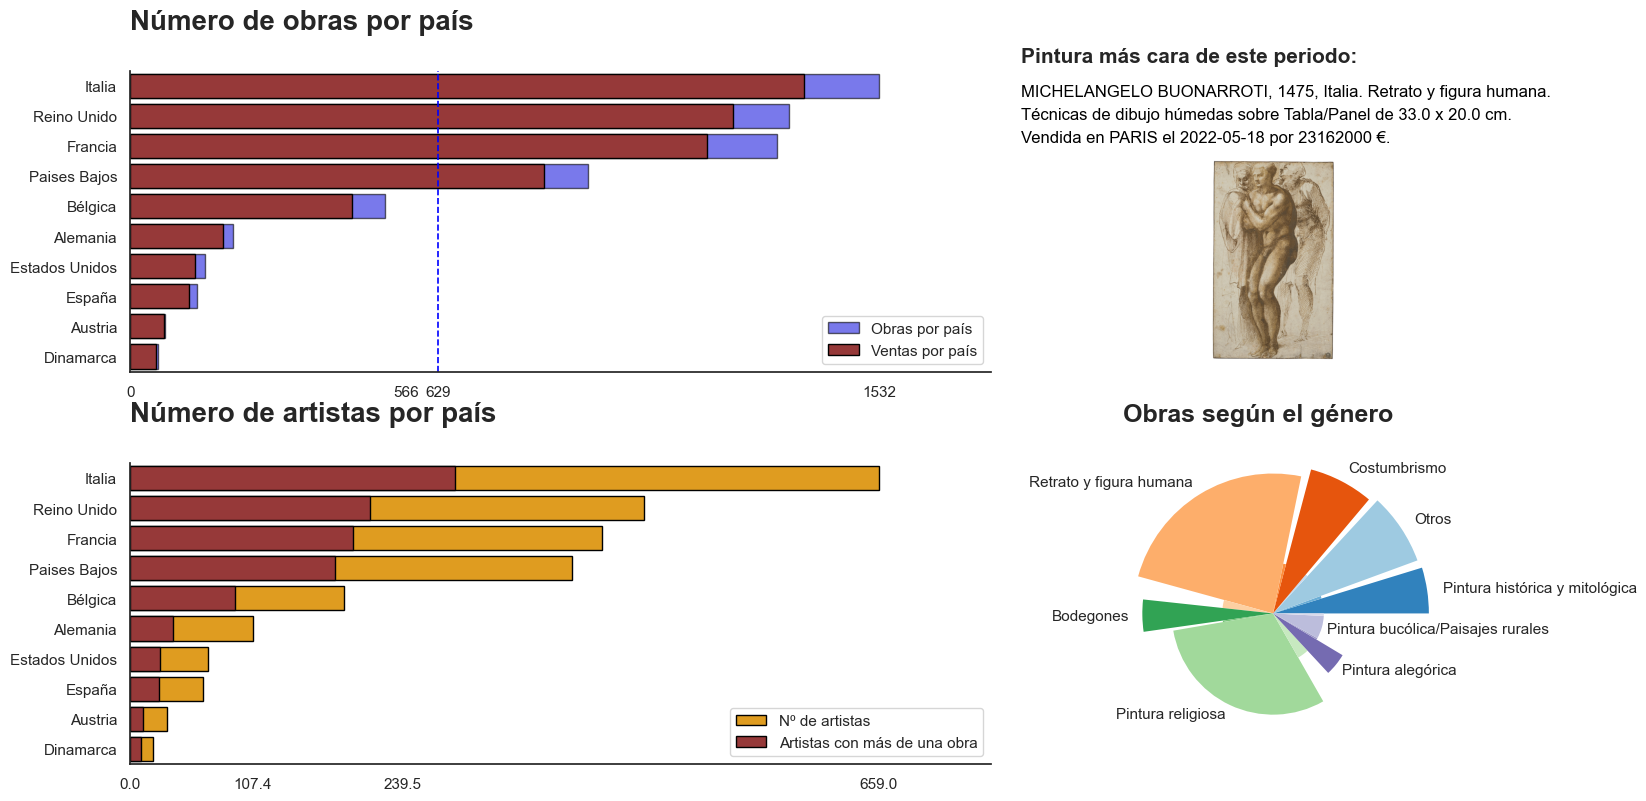

In [15]:
Paises = list(Artistas['País'].unique())
Paises.remove('Desconocido')

idxFilasArt = [list(Artistas.loc[Artistas['País'] == pais].index) for i,pais in enumerate( Paises)]
idxFilasOb = [list(df.loc[df['País'] == pais].index) for i,pais in enumerate( Paises)]

graf_paisesob =[[pais, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, pais in enumerate(Paises)]
graf_paisesart =[[ pais , len(idxFilasArt[i]), sum([(1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i]])]  for i, pais in enumerate(Paises)] 

graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

graf_paisesob = graf_paisesob [:10]
graf_paisesart = graf_paisesart [:10]

obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]


fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(9, 8)

ax1 = fig.add_subplot(gs[:4, :5])
ax2 = fig.add_subplot(gs[5:, :5])
ax3 = fig.add_subplot(gs[:1, 5:])
ax4 = fig.add_subplot(gs[1:4, 5:])

ax5 = fig.add_subplot(gs[5:,5:])


sns.set_color_codes("pastel")
sns.barplot(y=obras_y, x=obras_x, ax=ax1, color='blue', alpha=0.6, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
sns.barplot(y=obras_y, x=ventas_x, ax=ax1, color='brown',alpha=1, edgecolor='black', label='Ventas por país')
# Configurar el gráfico
ax1.set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
ax1.set_xlim(0, max(obras_x)*1.15)

ax1.set_xticks([0,np.array(ventas_x).mean() ,np.array(obras_x).mean(), max(obras_x)])
sns.despine(right=True, top=True)
 

ax1.axvline(np.mean(obras_x), linestyle='--', color='blue', linewidth=1.2)  # Media de obras


ax1.legend()


# Plotear la cantidad total de artistas por país
sns.set_color_codes("pastel")
sns.barplot(y=artistas_y, x=artistas_x, ax=ax2, color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
sns.barplot(y=artistas_y, x=conocido_x, ax=ax2, color='brown', edgecolor='black', label='Artistas con más de una obra') 
# Configurar el gráfico
ax2.set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
ax2.set_xlim(0, max(artistas_x)*1.15)
sns.despine(right=True, top=True)

ax2.set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])


idxFilasObperiodo = list(df.loc[(df['Año de nacimiento'].isin(Años)) & (df['Vendido'] == 1)].index)

# Encuentra la obra más cara vendida
if not idxFilasObperiodo:
        print("No hay obras vendidas en el intervalo seleccionado.")
        

obra_index = max(idxFilasObperiodo, key=lambda x: df.loc[x, 'Precio_num'])  # Obtener el índice de la obra más cara
obra = df.iloc[obra_index] 



ax3.set_title("Pintura más cara de este periodo:", fontsize=15, fontweight='bold', loc='left')

# Eliminar ejes
ax3.axis('off')  # Esto quita todos los ejes para que no haya recuadro

# Texto sobre la obra
ax3.text(0, 0.8, f"{obra['Nombre']}, {int(obra['Año de nacimiento'])}, {obra['País']}. {obra['Género']}.",
        fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
ax3.text(0, 0.45, f"{obra['Medio']} sobre {obra['Soporte']} de {round(obra['Alto'],2)} x {round(obra['Ancho'],2)} cm.",
        fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
ax3.text(0, 0.1, f"Vendida en {obra['Ciudad']} el {obra['Fecha']} por {int(obra['Precio_num'])} €.",
        fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)

response = requests.get(obra['URL imagen'])
if response.status_code == 200:  # Verificar si la solicitud tuvo éxito
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    ax4.imshow(image)
    ax4.axis('off')  # Quitar el eje
else:
    print("Error al cargar la imagen.")

idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                                    (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


graf_generos = sorted(graf_generos, key=lambda x: x[1], reverse=True)

habituales=graf_generos[:7]
habituales.append(['Otros', sum([genero[1] for i,genero in enumerate(graf_generos[7:])]), sum(genero[2] for i,genero in enumerate(graf_generos[7:])), sum(genero[3] for i,genero in enumerate(graf_generos[7:]))/len(graf_generos[7 :])  ])  

graf_generos=habituales
graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
for genero in graf_generos:
        genero[1] = genero[1] - genero[2]
        genero[3] = genero[3]/preciomedio

sectores=[]
for  i,genero in enumerate(graf_generos):
        
        sectores.append([genero[0], genero[2], genero[3]])
        sectores.append([" ", genero[1], 1])
        

etiquetas = [sector[0] for sector in sectores]
valores = [sector[1] for sector in sectores]                                              
radios = [sector[2] for sector in sectores] 


min_radio=min(radios)
radios=[(radio/min_radio if i % 2 == 0 else 1) for i, radio in enumerate(radios)]
radios=np.array(radios)*min_radio


ax5.set_title("Obras según el género", fontsize=18, fontweight='bold', loc='left', pad=30)

cmap = plt.colormaps["tab20c"]
inner_colors = cmap(range(len(etiquetas)))  # Elige colores de acuerdo a la longitud de etiquetas



for i,sector in enumerate(sectores):
        
        try:
                vals =np.array([np.array(valores[:i]).sum(), valores[i], np.array(valores[i+1:]).sum()])
                etiq=[None, etiquetas[i], None]
                colores=[(1, 1, 1, 0), inner_colors[i], (1, 1, 1, 0)]
        except:
                break
        
        ax5.pie(vals, radius=radios[i], colors=colores,
                
        wedgeprops=dict(edgecolor=None, linewidth=0), labels=etiq)

        ax5.set(aspect="equal")


plt.tight_layout(h_pad= 20)
plt.show()

In [16]:
min_year = int(df['Año de nacimiento'].min())
max_year = int(df['Año de nacimiento'].max())

# Filtrar advertencias específicas
warnings.filterwarnings("ignore")

graf_output = Output()


def representar_obras_y_artistas_por_paises(intervalo_años):
    
    Años = range(intervalo_años[0], intervalo_años[1] , 1) 
    
    Paises = list(Artistas['País'].unique())
    Paises.remove('Desconocido')# Intervalo de años basado en el slider
    
    idxFilasArt = [list(Artistas.loc[(Artistas['País'] == pais) & 
                                       (Artistas['Año de nacimiento'].isin(Años))].index) for pais in Paises]
    idxFilasOb = [list(df.loc[(df['País'] == pais) & 
                               (df['Año de nacimiento'].isin(Años))].index) for pais in Paises]

    graf_paisesob =[[pais, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, pais in enumerate(Paises)]
    graf_paisesart =[[ pais , len(idxFilasArt[i]), sum([(1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i]])]  for i, pais in enumerate(Paises)] 

    graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
    graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

    graf_paisesob = graf_paisesob [:10]
    graf_paisesart = graf_paisesart [:10]

    obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
    obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
    ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

    artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
    artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
    conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]
    
    with graf_output:
        
        graf_output.clear_output(wait=True)
        
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(9, 8)

        ax1 = fig.add_subplot(gs[:4, :5])
        ax2 = fig.add_subplot(gs[5:, :5])
        ax3 = fig.add_subplot(gs[0, 5:])
        ax4 = fig.add_subplot(gs[1:5, 5:])

        ax5 = fig.add_subplot(gs[6:,5:])


        sns.set_color_codes("pastel")
        sns.barplot(y=obras_y, x=obras_x, ax=ax1, color='grey', alpha=1, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
        sns.barplot(y=obras_y, x=ventas_x, ax=ax1, color='brown',alpha=1, edgecolor='black', label='Ventas por país')
        # Configurar el gráfico
        ax1.set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax1.set_xlim(0, max(obras_x)*1.05)

        ax1.set_xticks([0 ,np.array(obras_x).mean(), max(obras_x)])
        
        labels = ax1.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax1.set_yticklabels(labels)
        
        sns.despine(right=True, top=True)
        

        ax1.axvline(np.mean(obras_x), linestyle='--', color='black', linewidth=1.2)  # Media de obras
        ax1.axvline(np.quantile(obras_x, 0.25), linestyle='--', color='black', linewidth=0.5) 
        ax1.axvline(np.quantile(obras_x, 0.75), linestyle='--', color='black', linewidth=0.5) 

        ax1.legend()


        # Plotear la cantidad total de artistas por país
        sns.set_color_codes("pastel")
        sns.barplot(y=artistas_y, x=artistas_x, ax=ax2, color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
        sns.barplot(y=artistas_y, x=conocido_x, ax=ax2, color='brown', edgecolor='black', label='Artistas con más de una obra') 
        # Configurar el gráfico
        ax2.set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax2.set_xlim(0, max(artistas_x)*1.05)
        
        labels = ax2.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax2.set_yticklabels(labels)
        
        
        sns.despine(right=True, top=True)
        
        ax2.axvline(np.mean(artistas_x), linestyle='--', color='black', linewidth=1.2)

        ax2.set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])


        idxFilasObperiodo = list(df.loc[(df['Año de nacimiento'].isin(Años)) & (df['Vendido'] == 1)].index)

        # Encuentra la obra más cara vendida
        if not idxFilasObperiodo:
            print("No hay obras vendidas en el intervalo seleccionado.")
                

        obra_index = max(idxFilasObperiodo, key=lambda x: df.loc[x, 'Precio_num'])  # Obtener el índice de la obra más cara
        obra = df.iloc[obra_index] 



        ax3.set_title("Pintura más cara de este periodo:", fontsize=15, fontweight='bold', loc='left')

        # Eliminar ejes
        ax3.axis('off')  # Esto quita todos los ejes para que no haya recuadro

        # Texto sobre la obra
        ax3.text(0, 0.7, f"{obra['Nombre']}, {int(obra['Año de nacimiento'])}, {obra['País']}. {obra['Género']}.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.45, f"{obra['Medio']} sobre {obra['Soporte']} de {round(obra['Alto'],2)} x {round(obra['Ancho'],2)} cm.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.1, f"Vendida en {obra['Ciudad']} el {obra['Fecha']} por {int(obra['Precio_num'])} €.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)

        response = requests.get(obra['URL imagen'])
        if response.status_code == 200:  # Verificar si la solicitud tuvo éxito
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            ax4.imshow(image)
            ax4.axis('off')  # Quitar el eje
        else:
            print("Error al cargar la imagen.")

        idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                                            (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

        graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


        graf_generos = sorted(graf_generos, key=lambda x: x[1], reverse=True)

        habituales=graf_generos[:7]
        habituales.append(['Otros', sum([genero[1] for i,genero in enumerate(graf_generos[7:])]), sum(genero[2] for i,genero in enumerate(graf_generos[7:])), sum(genero[3] for i,genero in enumerate(graf_generos[7:]))/len(graf_generos[7 :])  ])  

        graf_generos=habituales
        graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
        preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
        for genero in graf_generos:
                genero[1] = genero[1] - genero[2]
                genero[3] = genero[3]/preciomedio

        sectores=[]
        for  i,genero in enumerate(graf_generos):
                
                sectores.append([genero[0], genero[2], genero[3]])
                sectores.append([" ", genero[1], 1])
                

        etiquetas = [sector[0] for sector in sectores]
        valores = [sector[1] for sector in sectores]                                              
        radios = [sector[2] for sector in sectores] 


        min_radio=min(radios)
        radios=[(radio/min_radio if i % 2 == 0 else 1) for i, radio in enumerate(radios)]
        radios=np.array(radios)*min_radio


        ax5.set_title("Obras según el género", fontsize=18, fontweight='bold', loc='left', pad=30)

        cmap = plt.colormaps["tab20c"]
        inner_colors = cmap(range(len(etiquetas)))  # Elige colores de acuerdo a la longitud de etiquetas

        for i,sector in enumerate(sectores):
                
                try:
                        vals =np.array([np.array(valores[:i]).sum(), valores[i], np.array(valores[i+1:]).sum()])
                        etiq=[None, etiquetas[i], None]
                        colores=[(1, 1, 1, 0), inner_colors[i], (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=radios[i], colors=colores,
                        
                wedgeprops=dict(edgecolor=None, linewidth=0), labels=etiq)

                ax5.set(aspect="equal")


        plt.tight_layout(h_pad= 30, w_pad=10)
        plt.show()


# Crear el control deslizante para el rango de años
year_range_slider = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='60%')  # Aquí puedes ajustar el ancho del slider
)



# Observador para el control deslizante de años
def update_plot(year_range):
    start_year, end_year = year_range
    representar_obras_y_artistas_por_paises((start_year, end_year))

# Conectar el evento del slider con la función de actualización
year_range_slider.observe(lambda change: update_plot(year_range_slider.value), names='value')



# Mostrar los gráficos y el slider en una estructura organizada
display(VBox([graf_output, year_range_slider],layout=Layout(margin='30px 0px 30px 0px')) )

# Mostrar el gráfico inicialmente
update_plot(year_range_slider.value)
        


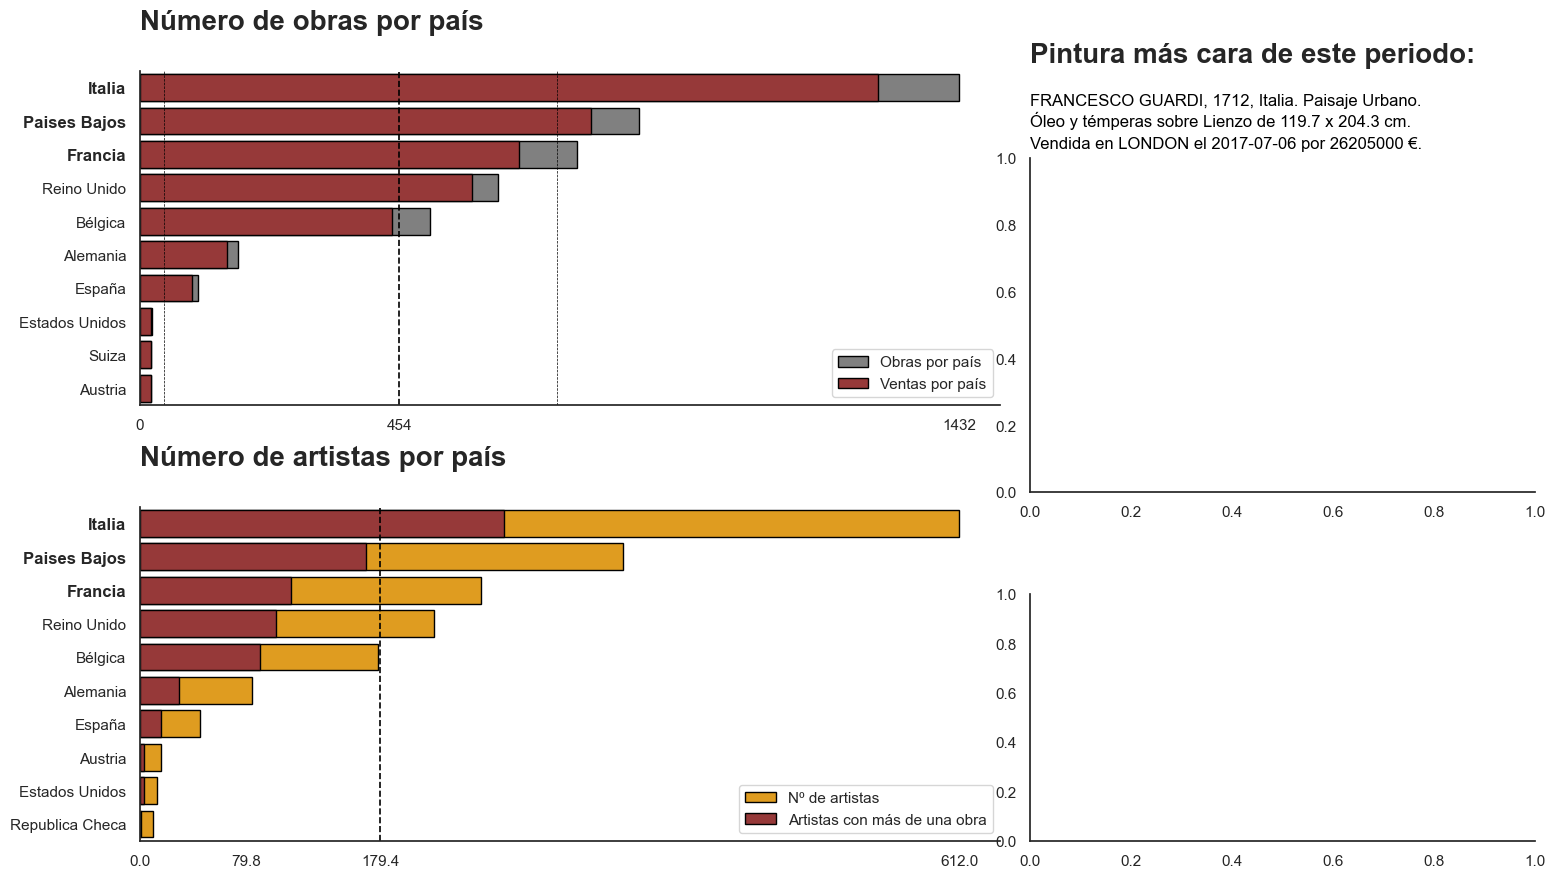

In [17]:
min_year = int(df['Año de nacimiento'].min())
max_year = int(df['Año de nacimiento'].max())

# Filtrar advertencias específicas
warnings.filterwarnings("ignore")

graf_output = Output()


def representar_obras_y_artistas_por_paises(intervalo_años):
    
    Años = range(intervalo_años[0], intervalo_años[1] , 1) 
    
    Paises = list(Artistas['País'].unique())
    Paises.remove('Desconocido')# Intervalo de años basado en el slider
    
    idxFilasArt = [list(Artistas.loc[(Artistas['País'] == pais) & 
                                       (Artistas['Año de nacimiento'].isin(Años))].index) for pais in Paises]
    idxFilasOb = [list(df.loc[(df['País'] == pais) & 
                               (df['Año de nacimiento'].isin(Años))].index) for pais in Paises]

    graf_paisesob =[[pais, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, pais in enumerate(Paises)]
    graf_paisesart =[[ pais , len(idxFilasArt[i]), sum([(1 if Artistas.loc[j,'Apariciones'] > 1 else 0) for j in idxFilasArt[i]])]  for i, pais in enumerate(Paises)] 

    graf_paisesob = sorted(graf_paisesob, key=lambda x: x[1], reverse=True)
    graf_paisesart = sorted(graf_paisesart, key=lambda x: x[1], reverse=True)

    graf_paisesob = graf_paisesob [:10]
    graf_paisesart = graf_paisesart [:10]

    obras_y = [pais[0] for i, pais in enumerate(graf_paisesob)]
    obras_x = [pais[1] for i, pais in enumerate(graf_paisesob)]
    ventas_x = [pais[2] for i, pais in enumerate(graf_paisesob)]

    artistas_y = [pais[0] for i, pais in enumerate(graf_paisesart)]
    artistas_x = [pais[1] for i, pais in enumerate(graf_paisesart)]
    conocido_x = [pais[2] for i, pais in enumerate(graf_paisesart)]
    
    with graf_output:
        
        graf_output.clear_output(wait=True)
        
        fig = plt.figure(figsize=(18, 10))
        gs = fig.add_gridspec(9, 8)

        ax1 = fig.add_subplot(gs[:4, :5])
        ax2 = fig.add_subplot(gs[5:, :5])
        ax3 = fig.add_subplot(gs[0, 5:])
        ax4 = fig.add_subplot(gs[1:5, 5:])

        ax5 = fig.add_subplot(gs[6:,5:])


        sns.set_color_codes("pastel")
        sns.barplot(y=obras_y, x=obras_x, ax=ax1, color='grey', alpha=1, edgecolor='black', label='Obras por país')  # x e y pasan aquí correctamente
        sns.barplot(y=obras_y, x=ventas_x, ax=ax1, color='brown',alpha=1, edgecolor='black', label='Ventas por país')
        # Configurar el gráfico
        ax1.set_title("Número de obras por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax1.set_xlim(0, max(obras_x)*1.05)

        ax1.set_xticks([0 ,np.array(obras_x).mean(), max(obras_x)])
        
        labels = ax1.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax1.set_yticklabels(labels)
        
        sns.despine(right=True, top=True)
        

        ax1.axvline(np.mean(obras_x), linestyle='--', color='black', linewidth=1.2)  # Media de obras
        ax1.axvline(np.quantile(obras_x, 0.25), linestyle='--', color='black', linewidth=0.5) 
        ax1.axvline(np.quantile(obras_x, 0.75), linestyle='--', color='black', linewidth=0.5) 

        ax1.legend()


        # Plotear la cantidad total de artistas por país
        sns.set_color_codes("pastel")
        sns.barplot(y=artistas_y, x=artistas_x, ax=ax2, color='orange', edgecolor='black', label='Nº de artistas')  # x e y pasan aquí correctamente
        sns.barplot(y=artistas_y, x=conocido_x, ax=ax2, color='brown', edgecolor='black', label='Artistas con más de una obra') 
        # Configurar el gráfico
        ax2.set_title("Número de artistas por país", fontsize=20, fontweight='bold', loc='left', pad=30)
        ax2.set_xlim(0, max(artistas_x)*1.05)
        
        labels = ax2.get_yticklabels()  # Obtener etiquetas actuales
        for i in range(3):  # Aplicar formato a las tres primeras etiquetas
            labels[i].set_fontweight('bold') 
            labels[i].set_fontsize(12)# Hacer las primeras 3 etiquetas en negrita
        ax2.set_yticklabels(labels)
        
        
        sns.despine(right=True, top=True)
        
        ax2.axvline(np.mean(artistas_x), linestyle='--', color='black', linewidth=1.2)

        ax2.set_xticks([0,np.array(conocido_x).mean(), np.array(artistas_x).mean(), max(artistas_x)])


        idxFilasObperiodo = list(df.loc[(df['Año de nacimiento'].isin(Años)) & (df['Vendido'] == 1)].index)

        # Encuentra la obra más cara vendida
        if not idxFilasObperiodo:
            print("No hay obras vendidas en el intervalo seleccionado.")
                

        obra_index = max(idxFilasObperiodo, key=lambda x: df.loc[x, 'Precio_num'])  # Obtener el índice de la obra más cara
        obra = df.iloc[obra_index] 



        ax3.set_title("Pintura más cara de este periodo:", fontsize=20, fontweight='bold', loc='left')

        # Eliminar ejes
        ax3.axis('off')  # Esto quita todos los ejes para que no haya recuadro

        # Texto sobre la obra
        ax3.text(0, 0.7, f"{obra['Nombre']}, {int(obra['Año de nacimiento'])}, {obra['País']}. {obra['Género']}.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.45, f"{obra['Medio']} sobre {obra['Soporte']} de {round(obra['Alto'],2)} x {round(obra['Ancho'],2)} cm.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)
        ax3.text(0, 0.1, f"Vendida en {obra['Ciudad']} el {obra['Fecha']} por {int(obra['Precio_num'])} €.",
                fontsize=12, ha='left', va='top', color='black', transform=ax3.transAxes)

        response = requests.get(obra['URL imagen'])
        if response.status_code == 200:  # Verificar si la solicitud tuvo éxito
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            ax4.imshow(image)
            ax4.axis('off')  # Quitar el eje
        else:
            print("Error al cargar la imagen.")

 

        Generos = list(df['Género'].unique())

        idxFilasOb = [list(df.loc[(df['Género'] == genero) & 
                                (df['Año de nacimiento'].isin(Años))].index) for genero in Generos]

        graf_generos =[[genero, len(idxFilasOb[i]), sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]), sum([(df.loc[j,'Precio_num'] if pd.notnull(df.loc[j,'Precio_num']) else 0) for j in idxFilasOb[i]])/sum([df.loc[j,'Vendido'] for j in idxFilasOb[i]]) ] for i, genero in enumerate(Generos)]


        for i, genero in enumerate(graf_generos):
                if genero[1] <= 30:
                        graf_generos.remove(genero)


        graf_generos = sorted(graf_generos, key=lambda x: x[3], reverse=True)
        preciomedio = np.array([genero[3] for genero in graf_generos]).mean()  
        for genero in graf_generos:
                genero[1] = genero[1] - genero[2]
                genero[3] = genero[3]/preciomedio

        sectores=[]
        for  i,genero in enumerate(graf_generos):
        
                sectores.append([genero[0], genero[2], genero[3]])
                sectores.append([" ", genero[1], 1])
        

        etiquetas = [sector[0] for i,sector in enumerate(sectores)]
        valores = [sector[1] for i,sector in enumerate(sectores)]                                              
        radios = [sector[2] for i,sector in enumerate(sectores)] 

        valortotal = sum(valores)

        max_radio=max(radios)
        radios=[(radio/(max_radio)  if i % 2 == 0 else 1) for i, radio in enumerate(radios)]


        ax5.set_title("Obras según el género", fontsize=20, fontweight='bold', loc='left', pad=20)

        cmap = plt.colormaps["tab20c"]
        inner_colors = cmap(range(len(etiquetas)))  




        for i,genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
                        colores=[(1, 1, 1, 0), inner_colors[2*i], (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7, colors=colores,
                        
                wedgeprops=dict(width=0.35,edgecolor=None, linewidth=0))
        
        for i,genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i +1]).sum(), valores[2*i +1], np.array(valores[2*i+2:]).sum()])
                        colores=[(1, 1, 1, 0), 'orange', (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7, colors=colores,
                        
                wedgeprops=dict(width=0.35,edgecolor=None, linewidth=0))
        
        for i, genero in enumerate(graf_generos):
        
                try:
                        vals =np.array([np.array(valores[:2*i]).sum(), valores[2*i], np.array(valores[2*i+1:]).sum()])
                        etiq=[None, etiquetas[2*i], None]
                        colores=[(1, 1, 1, 0), inner_colors[2*i + 1], (1, 1, 1, 0)]
                except:
                        break
                
                ax5.pie(vals, radius=0.7 + radios[2*i]/2, colors=colores,
                        
                wedgeprops=dict(width=radios[2*i]/2 ,edgecolor=None, linewidth=0), labels=etiq)
        
        
        acum_angle = 0
        for i in range(len(graf_generos)):

                ax5.plot(
                        [0.35 * np.cos(acum_angle),(0.7 + radios[2*i]/2 )* np.cos(acum_angle)],
                        [0.35 * np.sin(acum_angle), (0.7 + radios[2*i]/2 )* np.sin(acum_angle)],
                        color='black', linestyle='--', linewidth=0.7
                )

                # Sumar el ángulo al acumulado para la próxima iteración
                acum_angle += (valores[2*i])/ valortotal * 2 * np.pi
                
                # Dibujar la línea radial usando el ángulo acumulado
                ax5.plot(
                        [0.35 * np.cos(acum_angle), (0.7 + radios[2*i]/2 )* np.cos(acum_angle)],
                        [0.35 * np.sin(acum_angle), (0.7 + radios[2*i]/2 )* np.sin(acum_angle)],
                        color='black', linestyle='--', linewidth=0.7
                )

                # Sumar el ángulo al acumulado para la próxima iteración
                acum_angle += (valores[2*i + 1])/ valortotal * 2 * np.pi 
        
        
        
        circle1 = Circle((0, 0), 0.7, color='black', fill=False, linewidth=0.8, linestyle='--')
        circle2 = Circle((0, 0), 0.35, color='black', fill=False, linewidth=0.8, linestyle='--')

        ax5.add_patch(circle1)
        ax5.add_patch(circle2)
        
        
        etiquetas_leyenda = ['Amplitud ~ Nº obras', 'Radio exterior ~ precio medio', 'No vendidas']

        leyenda_entries = [
        Line2D([0], [0], marker='*',color='none',  markerfacecolor='black'), 
        Line2D([0], [0], marker='*',color='none',  markerfacecolor='black') ,
        Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', markersize=10)  # No vendidas (naranja)
        ]

        # Añadir la leyenda personalizada al gráfico
        ax5.legend(leyenda_entries, etiquetas_leyenda, loc='center left', bbox_to_anchor=(1, 0), fontsize='small')



        plt.tight_layout(h_pad= 30, w_pad=20)
        plt.show()


# Crear el control deslizante para el rango de años
year_range_slider = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='60%')  # Aquí puedes ajustar el ancho del slider
)



# Observador para el control deslizante de años
def update_plot(year_range):
    start_year, end_year = year_range
    representar_obras_y_artistas_por_paises((start_year, end_year))

# Conectar el evento del slider con la función de actualización
year_range_slider.observe(lambda change: update_plot(year_range_slider.value), names='value')



# Mostrar los gráficos y el slider en una estructura organizada
display(VBox([graf_output, year_range_slider],layout=Layout(margin='30px 0px 30px 0px')) )

# Mostrar el gráfico inicialmente
update_plot(year_range_slider.value)
        


In [18]:
def representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, intervalo_años):

    graf_Años = pd.DataFrame(columns=['Año', 'TObras', 'TVentas', 'MinEst Medio', 'MaxEst Medio', 'PrecioMv', 'PrecioMs'])
    min_año = int(df['Año de nacimiento'].min())
    max_año = int(df['Año de nacimiento'].max()) 
    
    rango=(intervalo_años[1]-intervalo_años[0])/15
    rango=int(rango)
    
    Años = range(intervalo_años[0] + rango, intervalo_años[1] - rango + 1, (int(rango/8) if rango >= 8 else 1))
    idxFilas = [list(df.loc[(abs(df['Año de nacimiento'] - año) <= rango) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in Años]
    
    
    idFilas = [list(df.loc[(df['Año de nacimiento'] == año) & 
                             (df['País'].isin(paiseselegidos)) & 
                             (df['Género'].isin(generoselegidos))].index) for año in range(intervalo_años[0] + rango, intervalo_años[1] - rango)]
    
    TObras = []
    TVentas = []   
    PrecioMv = [] 
    PrecioMs = []    
    MaxEst = []    
    MinEst = []
    
    graf_Años['Año'] = Años
    
    for i, año in enumerate(graf_Años['Año']):
        TObras.append((len(idxFilas[i]) if len(idxFilas[i]) > 0 else 1)/(2*rango))
        TVentas.append((sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) if sum([df.loc[j, 'Vendido'] for j in idxFilas[i]]) > 0 else 1)/(2*rango))
        
        
        PrecioMv.append(round(sum((df.loc[j, 'Precio_num'] if df.loc[j, 'Vendido']==1 else 0) for j in idxFilas[i]) /(2*rango* TVentas[i]), 2) if TVentas[i] > 0 else 0 )
        PrecioMs.append(round(sum([df.loc[j, 'Precio_num'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Precio_num'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)        
        MaxEst.append(round(sum([df.loc[j, 'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Máximo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        MinEst.append(round(sum([df.loc[j, 'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df.loc[j, 'Mínimo estimado'])]) /(2*rango* TObras[i]) , 2) if TObras[i] > 0 else 0)
        
    graf_Años['TObras'] = TObras
    graf_Años['TVentas'] = TVentas
    graf_Años['PrecioMv'] = PrecioMv
    graf_Años['PrecioMs'] = PrecioMs
    graf_Años['MaxEst Medio'] = MaxEst
    graf_Años['MinEst Medio'] = MinEst

    TotalObras = sum(TObras) 
    TotalVentas = sum(TVentas)  
    TotalObrasABS = sum(len(idFilas[i]) for i, año in enumerate(idFilas))
    TotalVentasABS = sum(sum([df.loc[j, 'Vendido'] for j in idFilas[i]]) for i, año in enumerate(idFilas))
    
    Porcentaje = round((TotalVentasABS/TotalObrasABS) * 100, 2) if TotalObrasABS > 0 else 0
    
    PrecioMvGlobal = sum((PrecioMv[i] * TVentas[i] for i in range(len(Años)))) / TotalVentas if TotalVentas > 0 else 0
    PrecioMsGlobal = sum((PrecioMs[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMaxMGlobal = sum((MaxEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    EstMinMGlobal = sum((MinEst[i] * TObras[i] for i in range(len(Años)))) / TotalObras if TotalObras > 0 else 0
    

    with graf_output2:
        graf_output2.clear_output(wait=True)
        
        sns.set_theme(style="white")

        # Crear figura y ejes para dos subgráficos
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 9))

        # Primer gráfico
        axes[0].set_title("Número de obras", fontsize=20, fontweight='bold', loc='left', pad=30)
        sns.lineplot(x="Año", y="TObras", data=graf_Años, label='Subastasdas', color='blue', ax=axes[0])
        sns.lineplot(x="Año", y="TVentas", data=graf_Años, label='Vendidas', color='red', ax=axes[0])

        # Rellenar área entre líneas
        axes[0].fill_between(graf_Años['Año'], graf_Años['TVentas'], color='red', alpha=0.15)
        axes[0].fill_between(graf_Años['Año'], graf_Años['TObras'], graf_Años['TVentas'], color='blue', alpha=0.3)

        # Configuración del gráfico
        axes[0].set_xlabel("")
        axes[0].set_ylabel("")
        yticks = axes[0].get_yticks()
        axes[0].set_yticks([yticks[1], yticks[int(len(yticks) / 2)], yticks[-2]])
        axes[0].grid(False)
        axes[0].spines['bottom'].set_color('black')
        axes[0].spines['left'].set_color('black')
        
        # Segundo gráfico
        axes[1].set_title("Precios medios y valores estimados", fontsize=20, fontweight='bold', loc='left', pad=30)

        sns.lineplot(x="Año", y="MaxEst Medio", data=graf_Años, label='Máx. estimado', color='orange', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMv", data=graf_Años, label='Precio Medio por venta', color='red', ax=axes[1])
        sns.lineplot(x="Año", y="PrecioMs", data=graf_Años, label='medio por subasta', color='blue', ax=axes[1], linewidth=0.7, linestyle='--')
        
        sns.lineplot(x="Año", y="MinEst Medio", data=graf_Años, label='Mín. estimado', color='orange', ax=axes[1])

        
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], color='brown', linewidth=0.5, linestyle='--')
        axes[1].plot([min_año - 10, max_año + 10], [PrecioMvGlobal, PrecioMvGlobal], color='red', linewidth=0.8)
        axes[1].plot([min_año - 10, max_año + 10], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='brown', linewidth=0.5, linestyle='--')
        
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between([min_año+30, max_año-29], [graf_Años['PrecioMv'].quantile(0.25), graf_Años['PrecioMv'].quantile(0.25)], [graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].quantile(0.75)], color='limegreen', alpha=0.3)
        axes[1].fill_between(graf_Años['Año'], graf_Años['MaxEst Medio'], graf_Años['MinEst Medio'], color='orange', alpha=0.4)
        axes[1].fill_between(graf_Años['Año'], graf_Años['PrecioMv'], graf_Años['PrecioMs'], color='blue', alpha=0.3)
        
        axes[1].set_xlim(intervalo_años[0], intervalo_años[1])
        axes[1].set_xlabel("")
        axes[1].set_ylabel("")
        axes[1].set_yticks([graf_Años['PrecioMv'].quantile(0.25), PrecioMvGlobal ,graf_Años['PrecioMv'].quantile(0.75), graf_Años['PrecioMv'].max() ])
        axes[1].grid(False)
        axes[1].spines['bottom'].set_color('black')
        axes[1].spines['left'].set_color('black')

        plt.tight_layout(h_pad=4)
        plt.show()
        
    with totales_output1:
        totales_output1.clear_output(wait=True)
        
        fig, axe = plt.subplots(nrows=4, ncols=1, figsize=(3, 4))
        axe[0].set_title("Totales:", fontsize=20, color='black', fontweight='bold', loc='center', pad=10)
        axe[0].spines['top'].set_visible(False)
        axe[0].spines['bottom'].set_visible(False)
        axe[0].spines['left'].set_visible(False)
        axe[0].spines['right'].set_visible(False)
        axe[0].set_xticks([])
        axe[0].set_yticks([])

        axe[1].set_title(f"Subastadas: {TotalObrasABS}", fontsize=15, color='blue', fontweight='bold', loc='center', pad=10)
        axe[1].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[1].set_ylim(0,1)
        
        axe[1].spines['top'].set_visible(False)
        axe[1].spines['bottom'].set_visible(False)
        axe[1].spines['left'].set_visible(False)
        axe[1].spines['right'].set_visible(False)
        axe[1].set_xticks([])
        axe[1].set_yticks([])


        axe[2].set_title(f"Vendidas: {TotalVentasABS}", fontsize=15, color='red', fontweight='bold', loc='center', pad=10)
        axe[2].plot([0, 1], [1,1], color='black', linewidth=8, alpha=0.5)
        axe[2].set_ylim(0,1)
        
        axe[2].spines['top'].set_visible(False)
        axe[2].spines['bottom'].set_visible(False)
        axe[2].spines['left'].set_visible(False)
        axe[2].spines['right'].set_visible(False)
        axe[2].set_xticks([])
        axe[2].set_yticks([])

        axe[3].set_title( f"{Porcentaje} %", fontsize=20, color='purple', fontweight='bold', loc='center', pad=10)
        axe[3].plot([0, 1], [1,1], color='black', linewidth=5)
        axe[3].set_ylim(0,1)
        axe[3].spines['top'].set_visible(False)
        axe[3].spines['bottom'].set_visible(False)
        axe[3].spines['left'].set_visible(False)
        axe[3].spines['right'].set_visible(False)
        axe[3].set_xticks([])
        axe[3].set_yticks([])


        plt.tight_layout(h_pad=1)
        plt.show()
        
        
    with totales_output2:
        totales_output2.clear_output(wait=True)
        
        fig, ax1 = plt.subplots(figsize=(3, 4.2))
        ax1.set_title("Promedios globales", fontsize=16, fontweight='bold', loc='center', pad=40)

        # Línea central vertical más gruesa usando plt.plot para ajustar linewidth
        ax1.plot([1.3, 1.3], [EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15], color='black', linewidth=1)

        # Líneas horizontales
        sns.lineplot(x=[1, 1.6], y=[PrecioMvGlobal, PrecioMvGlobal], color='red', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMaxMGlobal, EstMaxMGlobal], color='orange', ax=ax1)
        sns.lineplot(x=[1.15, 1.45], y=[EstMinMGlobal, EstMinMGlobal], color='orange', ax=ax1)

        # Áreas sombreadas
        ax1.fill_between([1.15, 1.45], [EstMinMGlobal, EstMinMGlobal], [EstMaxMGlobal, EstMaxMGlobal], color='orange', alpha=0.4)
        ax1.fill_between([1, 1.6], [PrecioMsGlobal, PrecioMsGlobal], [PrecioMvGlobal, PrecioMvGlobal], color='blue', alpha=0.2)

        ax1.grid(False)

        # Configurar los ejes
        ax1.set_xlim(1, 1.6)
        ax1.set_ylim(min(EstMinMGlobal,PrecioMvGlobal) * 0.75, max(PrecioMvGlobal, EstMaxMGlobal) * 1.15)

        # Ajustar visibilidad de los bordes
        ax1.spines['top'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        # Personalizar el spine derecho
        ax1.spines['right'].set_linestyle('-.')
        ax1.spines['right'].set_linewidth(0.6)
        ax1.spines['left'].set_linestyle('-.')
        ax1.spines['left'].set_linewidth(0.6)

        ax1.set_xticks([])
        ax1.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])
        ax1.set_yticklabels(['Est. Min', 'Est. Max', 'Precio'])
        
        ax2 = ax1.twinx()
        ax2.set_ylim(EstMinMGlobal * 0.75, PrecioMvGlobal * 1.15)

        ax2.set_yticks([EstMinMGlobal,  EstMaxMGlobal ,PrecioMvGlobal])

        plt.tight_layout()
        plt.show()

# Crear widgets de selección de países y géneros
Paises = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Paises Bajos', 'Francia', 'Reino Unido', 'Italia', 'Austria', 'Suiza', 'Desconocido']
Generos = df['Género'].unique()

# Widgets de selección de países
selectorespais = {pais: Checkbox(value=True, description=pais, layout=Layout(width='auto')) for pais in Paises}
# Widgets de selección de géneros
selectoresgeneros = {genero: Checkbox(value=True, description=genero, layout=Layout(width='auto')) for genero in Generos}

year_range_slider1 = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=Layout(width='95%')  # Aquí puedes ajustar el ancho del slider
)

# Crear etiquetas estilizadas
etiqueta_pais = HTML(value="<h3 style='text-align:center; font-weight:bold;'>País</h3>")
etiqueta_genero = HTML(value="<h3 style='text-align:center; font-weight:bold;'>Género</h3>")

# Contenedor para filtros de país con la etiqueta estilizada
columnapais = VBox([etiqueta_pais] + list(selectorespais.values()), layout=Layout(margin='20px 0 10px 0px' ))

# Contenedor para filtros de género con la etiqueta estilizada
columnagenero = VBox([etiqueta_genero] + list(selectoresgeneros.values()), layout=Layout(margin='0 0 30px 0px' ))

# Crear un contenedor para los filtros organizados en dos columnas
Cajonfiltros = VBox([columnapais, columnagenero], layout=Layout(margin='10px 30px 30px 0px' ))

# Crear un contenedor de salida para el gráfico con margen
graf_output2 = Output(layout=Layout(margin='10px 0 20px 10px'))  # Ajusta el margen izquierdo a tu gusto

totales_output1 = Output(layout=Layout(margin='0 0 10px 0'))
totales_output2 = Output(layout=Layout(margin='10px 0 0 0'))

totales_output = VBox([totales_output1, totales_output2], layout=Layout(margin='50px 5px 20px 5px' ))



def update_plot2(*args):
    paiseselegidos = [pais for pais, checkbox in selectorespais.items() if checkbox.value]
    generoselegidos = [genero for genero, checkbox in selectoresgeneros.items() if checkbox.value]
    representar_obras_y_precios_por_año(paiseselegidos, generoselegidos, year_range_slider1.value)
    
for checkbox in selectorespais.values():
    checkbox.observe(update_plot2, 'value')

for checkbox in selectoresgeneros.values():
    checkbox.observe(update_plot2, 'value')


# Conectar el evento del slider con la función de actualización
year_range_slider1.observe(lambda change: update_plot2(year_range_slider1.value), names='value')


cajacentral = VBox([graf_output2, year_range_slider1 ])



# Mostrar los widgets y el gráfico
display(HBox([Cajonfiltros, cajacentral, totales_output]))

update_plot2()


In [19]:
Años = range(1500, 1800 , 1) 

graf_distprecio = [[obra['Vendido'], obra['Precio_num'], obra['Año de nacimiento']] for i,obra in df.iterrows()]

precios=[]

for i,obra in df.iterrows():
    if obra['Vendido'] == 1:
        precios.append(obra['Precio_num'])

precios=sorted(precios)

min_precios = int(precios[0])
max_precios = int(precios[-1])

x_precios = []
y_precios = []
paso=4*min_precios 

x=0

while True:
    
    try:
        precio=precios[0]
    except:
        break
    num=1
    
    while precio < x + paso:
        
        num += 1
        try:
            precio=precios.pop(0)
        except:
            break

    y_precios.append(num)
    x_precios.append(x)
    
    x+= paso
    
    if x> max_precios or not precios:
        break





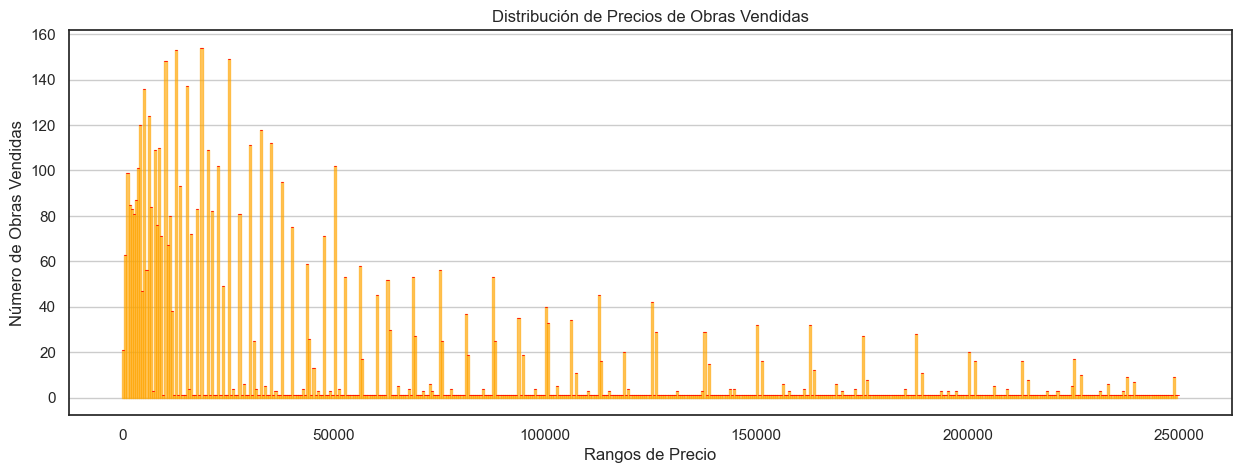

In [28]:

# Crear el gráfico de barras
plt.figure(figsize=(15, 5))

# Graficar cada barra con su ancho correspondiente
for i in range(len(x_precios)):
    try:
        plt.plot([x_precios[:500][i], x_precios[:1500][i+1]], [y_precios[:500][i], y_precios[:500][i]], color='red', linewidth=0.6)
        plt.fill_between([x_precios[:500][i], x_precios[:500][i+1]], [y_precios[:500][i], y_precios[:500][i]], color='orange', alpha=0.6)
    except:
        break

# Configuración adicional de la gráfica
plt.title('Distribución de Precios de Obras Vendidas')
plt.xlabel('Rangos de Precio')
plt.ylabel('Número de Obras Vendidas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

Los siguientes dos métodos para suavizar la distribución del precio (o una V.A. cualquiera) están basados en el mismo principio:

    Reemplazar el valor de la función en cada punto por el promedio de sus valores en un entorno reducido del mismo.

La única diferencia reside en el cálculo del promedio. El primer método pondera la media en función del recíproco de las distancias, esto hace que los saltos de discontinuidad de la función se suavicen muy rapidamente, pues al ponderar más los valores de la función cuanto más lejanos se consigue en apenas 3 iteraciones que los valores próximos se asemejen. Además, puesto que por cada punto el mecanismo para actualizar su valor está constreñido a un entorno reducido del mismo, a priori, no deberíamos afectar demasiado al comportamiento global de la función. En efecto, se logra un método que converge a una velocidad asombrosa a una función cuya forma se asemeja mucho a la de la distribución de partida; sin embargo, obsérvese la escala: al ponderar más los valores de la funión cuanto más alejados estén del punto (dentro de los limites del entorno considerado) la enorme curvatura de los datos de partida lastra tanto el valor que  el máximo de la función pasa de aproximadamente 250 al inicio a apenás 0.8 tras sólo 3 iteraciones. Siendo así no deja de ser sorprendente que la forma global de la función sea tan adecuadamente preservada.

In [31]:

L=20
coefs = [(sum(1/((n + k)*(L - k)) for k in range(1, L - n))/ sum(1/ j for j in range(1, L + 1)))/2 for n in range(1, L+1) ]
y_de_trabajo = y_precios

rep=0
while rep <= 3:
    y_val = []
    for i, x in enumerate(x_precios[:2000]):
        vals = []
        for n in range(1, L+1):
            try:
                vals.append(y_de_trabajo[i-n] * coefs[n-1])
            except:
                pass
            
            try:
                vals.append(y_de_trabajo[i+n] * coefs[n-1])
            except:
                pass
        
        y_val.append(np.array(vals).sum())
        
    y_de_trabajo = y_val
    rep+=1

print(y_val)


[np.float64(0.3218676715417951), np.float64(0.3806544521866566), np.float64(0.43555648920398327), np.float64(0.4873667637323014), np.float64(0.5363427832199668), np.float64(0.582365985493615), np.float64(0.625312854610192), np.float64(0.6650173400468077), np.float64(0.7013870126587765), np.float64(0.7340317406239807), np.float64(0.7633683742094153), np.float64(0.7886426841890165), np.float64(0.8105043992283238), np.float64(0.8284688314396911), np.float64(0.8426491905529983), np.float64(0.8535209307229873), np.float64(0.8605961276165661), np.float64(0.8645213490671325), np.float64(0.865177896183533), np.float64(0.8627288829735158), np.float64(0.8582448942274337), np.float64(0.8511895065462911), np.float64(0.8425147823455681), np.float64(0.8320861989569417), np.float64(0.8201749324552688), np.float64(0.8074703566495651), np.float64(0.7932457710235508), np.float64(0.7788227738490545), np.float64(0.7634349826534099), np.float64(0.7477604741019108), np.float64(0.7320732431183574), np.float6

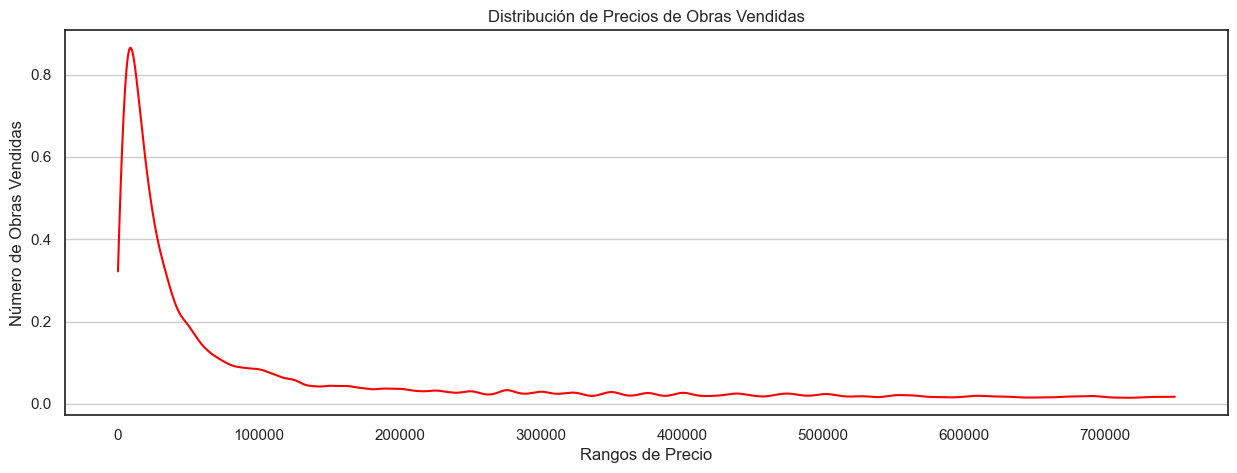

In [32]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=x_precios[:1500], y=y_val[:1500], color='red')

# Configuración adicional de la gráfica
plt.title('Distribución de Precios de Obras Vendidas')
plt.xlabel('Rangos de Precio')
plt.ylabel('Número de Obras Vendidas')
plt.grid(axis='y')

A la luz de lo expuesto, parece evidente que la manera de proceder es -- esencialmente la mmisma --, pero considerando el promedio local ponderado de forma proporcional a la distancia y no a la inversa. Este procedimiento converge mucho más lentamente (10 iteraciones siguen sin ser muchas) pero lo hace a una curva que tiene la misma escala que la de partida. La función resultante toma valor máximo igual a 120, perfectamente comparable a los 250 de los datos de partida dada su dispersión.

In [33]:
L=5
coefs = [(sum(1/((n + k)**2) for k in range(0, L - n +1))/ sum(1/j for j in range(1, L + 1)))/2 for n in range(1, L+1) ]
y_de_trabajo = y_precios

rep=0
while rep <= 50:
    y_val = []
    for i, x in enumerate(x_precios[:2000]):
        vals = []
        for n in range(1, L+1):
            try:
                vals.append(y_de_trabajo[i-n] * coefs[n-1])
            except:
                pass
            
            try:
                vals.append(y_de_trabajo[i+n] * coefs[n-1])
            except:
                pass
            
        y_val.append(np.array(vals).sum())
        
    y_de_trabajo = y_val
    rep+=1

print(y_val)

[np.float64(7.330204970391501), np.float64(11.804421315394825), np.float64(16.087080077209393), np.float64(20.301119988621707), np.float64(24.41309624581503), np.float64(28.362554014698134), np.float64(32.09571196203983), np.float64(35.60474810196773), np.float64(38.87245483966022), np.float64(41.88363909712474), np.float64(44.62691561973935), np.float64(47.09488924183727), np.float64(49.28388114482628), np.float64(51.19360784863496), np.float64(52.82704900382785), np.float64(54.1902028105893), np.float64(55.291782437073195), np.float64(56.142877027938624), np.float64(56.75659042892393), np.float64(57.14766714446926), np.float64(57.33211464558252), np.float64(57.32683192672433), np.float64(57.14925302755519), np.float64(56.81701299419515), np.float64(56.34764246771283), np.float64(55.75829574586814), np.float64(55.06551579101304), np.float64(54.28503829772496), np.float64(53.43163563750728), np.float64(52.51900029795497), np.float64(51.559666356643525), np.float64(50.56496659601937), n

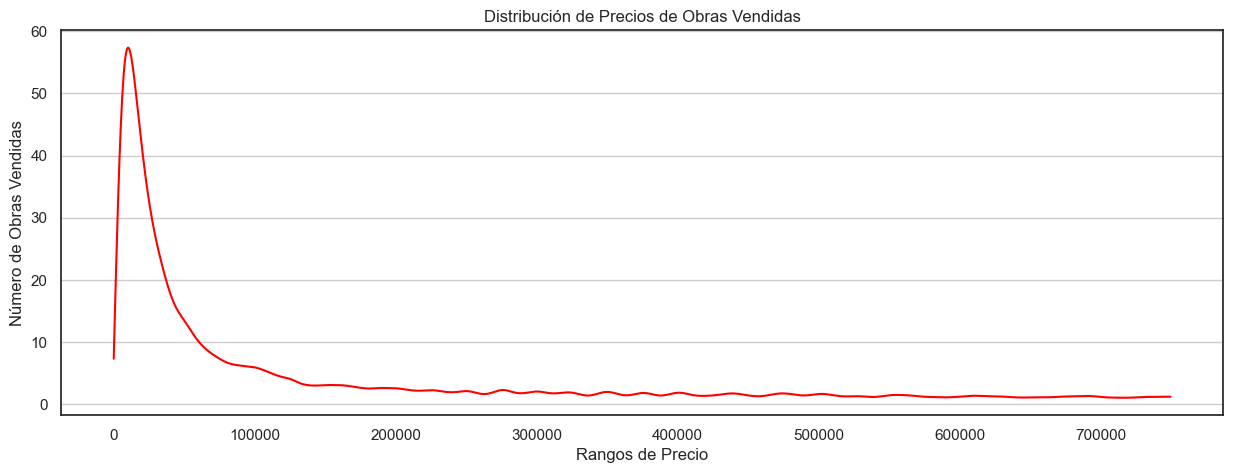

In [34]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=x_precios[:1500], y=y_val[:1500], color='red')

# Configuración adicional de la gráfica
plt.title('Distribución de Precios de Obras Vendidas')
plt.xlabel('Rangos de Precio')
plt.ylabel('Número de Obras Vendidas')
plt.grid(axis='y')


Un pequeño refinamiento del procedimiento con el fin de evitar que la curva se desplome:

Tras calcular el promedio local de la función, antes de actualizar, comparamos el valor obtenido con el valor vigente y si este fuera superior, el nuevo valor de la función se obtendrá como la media de ambos.

In [25]:
L=10
coefs = [(sum(1/((n + k)**2) for k in range(0, L - n +1))/ sum(1/j for j in range(1, L + 1)))/2 for n in range(1, L+1) ]
y_de_trabajo = y_precios

rep=0
while rep <= 30:
    y_val = []
    for i, x in enumerate(x_precios[:2000]):
        vals = []
        for n in range(1, L+1):
            try:
                vals.append(y_de_trabajo[i-n] * coefs[n-1])
            except:
                pass
            
            try:
                vals.append(y_de_trabajo[i+n] * coefs[n-1])
            except:
                pass
            
        if y_de_trabajo[i] >= np.array(vals).sum():
            y_val.append((np.array(vals).sum() + y_de_trabajo[i])/2)
        else:
            y_val.append(np.array(vals).sum())
        
    y_de_trabajo = y_val
    rep+=1

print(y_val)


[np.float64(14.93392451659047), np.float64(21.861682717487778), np.float64(27.900349639476033), np.float64(33.555020245306864), np.float64(38.926585201112076), np.float64(44.02149737958817), np.float64(48.81647920142022), np.float64(53.27962463763362), np.float64(57.379407799910794), np.float64(61.0893836848066), np.float64(64.39120234023363), np.float64(67.27758615226736), np.float64(69.7675924671183), np.float64(71.87633621201843), np.float64(73.62110726294401), np.float64(75.02187840047746), np.float64(76.10099609842526), np.float64(76.88261881027022), np.float64(77.39207749156229), np.float64(77.65523777823185), np.float64(77.6979075198424), np.float64(77.54531577925022), np.float64(77.22167926528695), np.float64(76.74986642511236), np.float64(76.15117315590396), np.float64(75.44516767968793), np.float64(74.64959356679637), np.float64(73.78033747593085), np.float64(72.85145739734999), np.float64(71.87526143049718), np.float64(70.86242856857731), np.float64(69.82216402553715), np.fl

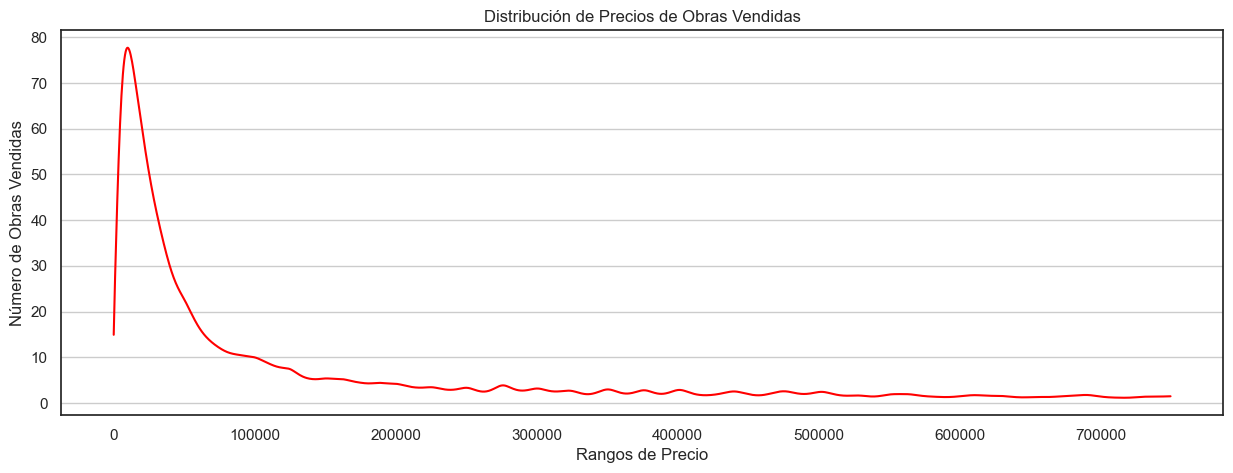

In [26]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=x_precios[:1500], y=y_val[:1500], color='red')

# Configuración adicional de la gráfica
plt.title('Distribución de Precios de Obras Vendidas')
plt.xlabel('Rangos de Precio')
plt.ylabel('Número de Obras Vendidas')
plt.grid(axis='y')

In [35]:
rep=0
while rep <= 20:
    y_val = []
    for i, x in enumerate(x_precios[:2000]):
        vals = []
        for n in range(1, L+1):
            try:
                vals.append(y_de_trabajo[i-n] * coefs[n-1])
            except:
                pass
            
            try:
                vals.append(y_de_trabajo[i+n] * coefs[n-1])
            except:
                pass
            
        y_val.append(np.array(vals).sum())
        
    y_de_trabajo = y_val
    rep+=1

print(y_val)

[np.float64(5.782901829630205), np.float64(9.317643759596448), np.float64(12.718745557179954), np.float64(16.088484465788472), np.float64(19.40552538128329), np.float64(22.626616959043332), np.float64(25.712876087170002), np.float64(28.660539279604688), np.float64(31.45738718188338), np.float64(34.09170431054211), np.float64(36.55369844764353), np.float64(38.83568661618424), np.float64(40.931953668476886), np.float64(42.83859993605776), np.float64(44.55355824363173), np.float64(46.07653910958467), np.float64(47.408940965585934), np.float64(48.55373858901488), np.float64(49.515354832950614), np.float64(50.29951821485524), np.float64(50.913109071120644), np.float64(51.36399817948787), np.float64(51.66088150280513), np.float64(51.81311447420327), np.float64(51.83054900013973), np.float64(51.72337606558686), np.float64(51.50197647611524), np.float64(51.17678187768292), np.float64(50.75814777762825), np.float64(50.256239863080324), np.float64(49.68093448851468), np.float64(49.0417337945768)